In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


In [2]:
users_df = pd.read_csv('train_users_2.csv')
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [3]:
sessions_df = pd.read_csv('sessions.csv')
sessions_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [4]:
# age 컬럼에서 18세 이상 122세 이하의 값을 제외한 나머지 값을 null로 처리
users_df.loc[(users_df['age'] < 18) | (users_df['age'] > 122), 'age'] = np.nan

users_df.age.isnull().sum()

88929

In [5]:
# 변환할 컬럼 지정
columns_to_convert = [
    'gender', 'signup_method', 'language', 'affiliate_channel', 
    'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 
    'first_device_type', 'first_browser', 'country_destination'
]

for column in columns_to_convert:
    users_df[column] = users_df[column].astype('category')

print(users_df.dtypes)

id                           object
date_account_created         object
timestamp_first_active        int64
date_first_booking           object
gender                     category
age                         float64
signup_method              category
signup_flow                   int64
language                   category
affiliate_channel          category
affiliate_provider         category
first_affiliate_tracked    category
signup_app                 category
first_device_type          category
first_browser              category
country_destination        category
dtype: object


In [6]:
# date_account_created 및 date_first_booking 컬럼을 datetime 타입으로 변환
users_df['date_account_created'] = pd.to_datetime(users_df['date_account_created'], errors='coerce')
users_df['date_first_booking'] = pd.to_datetime(users_df['date_first_booking'], errors='coerce')

# timestamp_first_active는 타임스탬프 형식으로 되어있으므로 변환
users_df['timestamp_first_active'] = pd.to_datetime(users_df['timestamp_first_active'], format='%Y%m%d%H%M%S', errors='coerce')

In [7]:
# 확인
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  category      
 5   age                      124522 non-null  float64       
 6   signup_method            213451 non-null  category      
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  category      
 9   affiliate_channel        213451 non-null  category      
 10  affiliate_provider       213451 non-null  category      
 11  first_affiliate_tracked  207386 non-null  category      
 12  signup_app      

In [8]:
# IQR을 이용한 이상치 제거
Q1 = sessions_df.groupby('action')['secs_elapsed'].transform(lambda x: x.quantile(0.25))
Q3 = sessions_df.groupby('action')['secs_elapsed'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1
outlier_condition = ~(
    (sessions_df['secs_elapsed'] < (Q1 - 1.5 * IQR)) | 
    (sessions_df['secs_elapsed'] > (Q3 + 1.5 * IQR))
)
sessions_df = sessions_df[outlier_condition]

# 개수 확인
sessions_df.count()

user_id          9141598
action           9092126
action_type      8140368
action_detail    8140368
device_type      9171752
secs_elapsed     9035721
dtype: int64

In [9]:
# NaN 값 처리
def fillna_with_mean(group):
    mean_value = group['secs_elapsed'].mean()
    group['secs_elapsed'].fillna(mean_value, inplace=True)
    return group

# DataFrame에 함수 적용
sessions_df = sessions_df.groupby('action').apply(fillna_with_mean)

# 확인
sessions_df.isnull().sum()

user_id            30008
action                 0
action_type      1031384
action_detail    1031384
device_type            0
secs_elapsed           0
dtype: int64

In [10]:
# 사용 기기 그룹화
def categorize_device_type(device):
    if device in ['iPhone', 'Android Phone', 'Windows Phone', 'Blackberry', 'Opera Phone', 'SmartPhone (Other)']:
        return 'Phone'
    elif device in ['iPad Tablet', 'Tablet', 'iPad', 'Android Tablet']:
        return 'Tablet'
    elif device in ['Mac Desktop', 'Windows Desktop', 'Linux Desktop', 'Chromebook', 'Desktop (Other)']:
        return 'Desktop'
    else:
        return 'Other Device'

# device_type 변환
users_df['first_device_category'] = users_df['first_device_type'].apply(categorize_device_type)

In [11]:
# 연령대 그룹화
def categorize_age(age):
    if pd.isnull(age):
        return 'unknown'
    elif age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    elif age < 70:
        return '60대'
    elif age < 80:
        return '70대'
    else:
        return '80대 이상'

users_df['age_group'] = users_df['age'].apply(categorize_age)
users_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,first_device_category,age_group
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,Desktop,unknown
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,Desktop,30대
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Desktop,50대
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Desktop,40대
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,Desktop,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaT,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,Desktop,30대
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,Desktop,unknown
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaT,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,Desktop,30대
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,NaT,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,Phone,unknown


# 병합 데이터

In [12]:
# 병합 데이터 불러오기 (redash에서 사용한 거)
users_session_df = pd.read_csv('user_session_merged_all.csv')
users_session_df

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1458/2105933729.py:2: DtypeWarning: Columns (3,4,7,8,9,10,12,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  users_session_df = pd.read_csv('user_session_merged_all.csv')


,idx,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,...,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,session_timestamp
0,1,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,2014-01-01 02:32:47,NaN,...,12.0,en,api,other,untracked,iOS,iPhone,-unknown-,NDF,2014-01-01 13:08:00
1,2,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01 17:33:17,2014-01-01,...,25.0,en,direct,direct,untracked,iOS,iPhone,-unknown-,US,2014-01-02 05:23:52
2,3,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01 22:35:37,2014-01-01,...,25.0,en,direct,direct,untracked,iOS,Android Phone,Chrome Mobile,US,2014-01-02 03:03:31
3,4,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,2014-01-03 07:03:32,NaN,...,25.0,en,direct,direct,untracked,iOS,Windows Desktop,Chrome,NDF,2014-01-04 18:03:32
4,5,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,2014-01-03 07:03:32,NaN,...,25.0,en,direct,direct,untracked,iOS,Windows Desktop,Chrome,NDF,2014-01-05 10:10:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9062113,9062114,osn94hm062,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,18959.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9062114,9062115,cpszutqnd1,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,21890.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9062115,9062116,ii1y9pqmsc,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,10513.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9062116,9062117,ssqamfzu1e,zendesk_login_jwt,-unknown-,-unknown-,Windows Desktop,1222.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# datetime 데이터 타입으로 변환 (에러 처리 : 숫자로 바꿀 수 없는 데이터는 NaN으로)
users_session_df['date_account_created'] = pd.to_datetime(users_session_df['date_account_created'], errors='coerce')
users_session_df['timestamp_first_active'] = pd.to_datetime(users_session_df['timestamp_first_active'], errors='coerce')
users_session_df['date_first_booking'] = pd.to_datetime(users_session_df['date_first_booking'], errors='coerce')
users_session_df['session_timestamp'] = pd.to_datetime(users_session_df['session_timestamp'], errors='coerce')

# session_timestamp가 null인 행 제거
users_session_df = users_session_df.dropna(subset=['session_timestamp'])

In [14]:
# device_type 변환
users_session_df['device_category'] = users_session_df['device_type'].apply(categorize_device_type)

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1458/492065964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_session_df['device_category'] = users_session_df['device_type'].apply(categorize_device_type)


In [15]:
# 연령대 그룹화 적용
users_session_df['age_group']=users_session_df['age'].apply(categorize_age)

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1458/4093245598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_session_df['age_group']=users_session_df['age'].apply(categorize_age)


In [16]:
users_session_df

,idx,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,...,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,session_timestamp,device_category,age_group
0,1,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,2014-01-01 02:32:47,NaT,...,api,other,untracked,iOS,iPhone,-unknown-,NDF,2014-01-01 13:08:00,Phone,20대
1,2,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01 17:33:17,2014-01-01,...,direct,direct,untracked,iOS,iPhone,-unknown-,US,2014-01-02 05:23:52,Phone,unknown
2,3,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01 22:35:37,2014-01-01,...,direct,direct,untracked,iOS,Android Phone,Chrome Mobile,US,2014-01-02 03:03:31,Phone,20대
3,4,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,2014-01-03 07:03:32,NaT,...,direct,direct,untracked,iOS,Windows Desktop,Chrome,NDF,2014-01-04 18:03:32,Phone,20대
4,5,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,2014-01-03 07:03:32,NaT,...,direct,direct,untracked,iOS,Windows Desktop,Chrome,NDF,2014-01-05 10:10:12,Phone,20대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9062101,9062102,xqaoo02bmz,zendesk_login_jwt,-unknown-,-unknown-,iPad Tablet,14858.0,2014-03-17,2014-03-17 03:08:59,NaT,...,sem-brand,google,omg,Web,iPad,Mobile Safari,NDF,2014-03-17 07:16:37,Tablet,40대
9062102,9062103,777ir2o54p,zendesk_login_jwt,-unknown-,-unknown-,iPhone,297.0,2014-04-08,2014-04-08 14:41:47,NaT,...,direct,direct,untracked,Moweb,iPhone,Mobile Safari,NDF,2014-04-08 14:46:44,Phone,20대
9062103,9062104,777ir2o54p,zendesk_login_jwt,-unknown-,-unknown-,iPhone,399.0,2014-04-08,2014-04-08 14:41:47,NaT,...,direct,direct,untracked,Moweb,iPhone,Mobile Safari,NDF,2014-04-08 14:48:26,Phone,20대
9062104,9062105,rnekihyoh0,zendesk_login_jwt,-unknown-,-unknown-,Windows Desktop,10303.0,2014-04-20,2014-04-20 06:35:47,2014-04-22,...,direct,direct,omg,Web,Windows Desktop,Firefox,other,2014-04-20 09:27:30,Desktop,80대 이상


In [69]:
# 연령대별 행동 패턴 분석: action의 빈도수
age_action_count = users_session_df.groupby(['age_group', 'action']).size().unstack().fillna(0)

# 연령대별 행동 패턴 분석: action_type의 빈도수
age_action_type_count = users_session_df.groupby(['age_group', 'action_type']).size().unstack().fillna(0)

# 연령대별 행동 패턴 분석: action_detail의 빈도수
age_action_detail_count = users_session_df.groupby(['age_group', 'action_detail']).size().unstack().fillna(0)

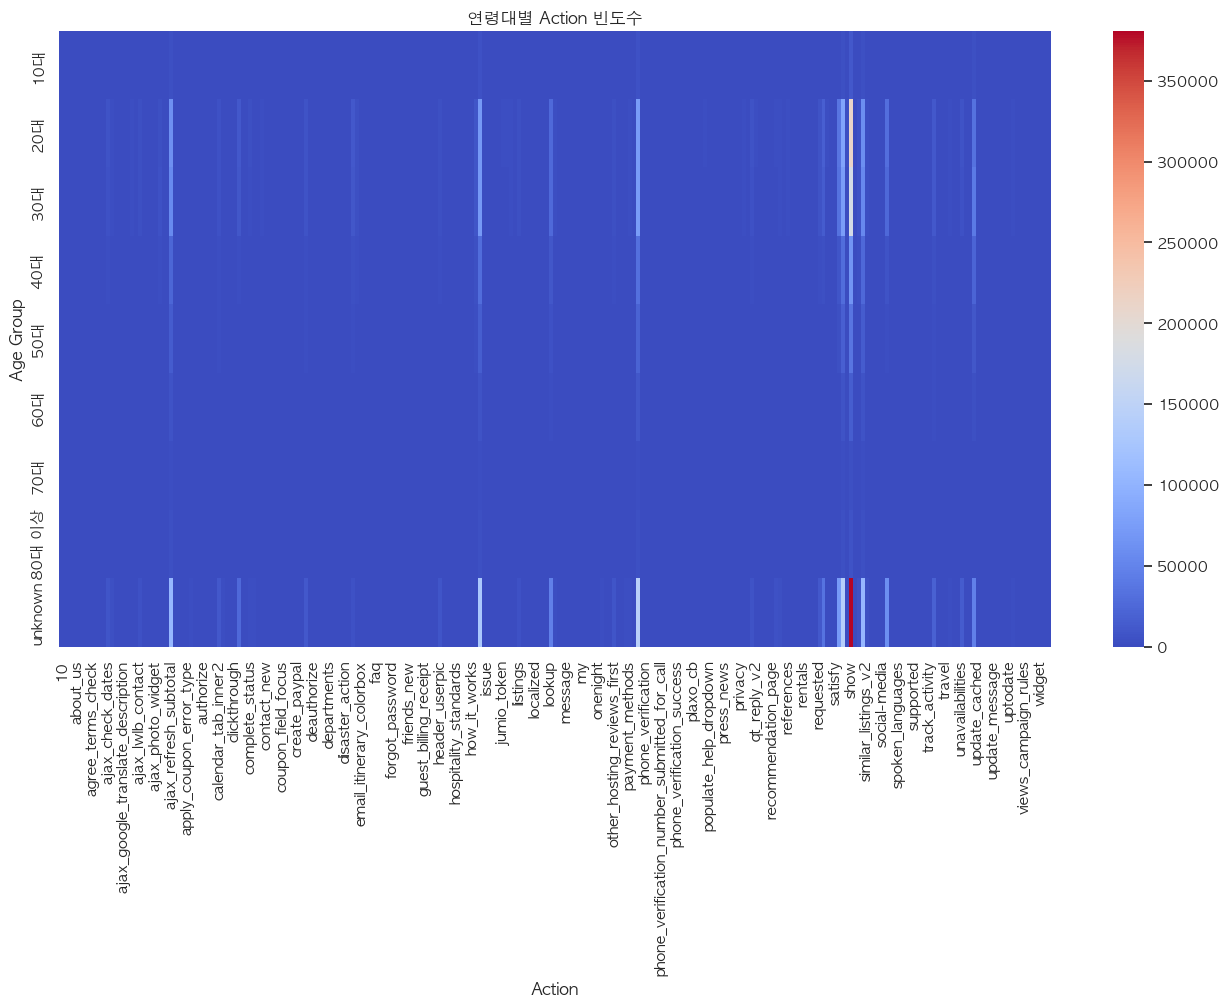

In [70]:
# 연령대별 action 빈도수 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(age_action_count, cmap='coolwarm')
plt.title('연령대별 Action 빈도수')
plt.xlabel('Action')
plt.ylabel('Age Group')
plt.show()

#### 사용자 연령대별 action 빈도수 히트맵
- 전반적인 빈도 분포를 보면 히트맵의 대부분이 파란색으로 표시되어 있으며, 이는 대부분의 action들이 상대적으로 낮은 빈도로 발생하고 있다는 것을 알 수 있다.
- `show`, `similar_listings`, `search_results` 등의 action이 상대적으로 더 높은 빈도로 발생하고 있는 것으로 보인다. 이 action들은 주로 예약 관련 정보 탐색과 관련된 것들이다. 특히, `similar_listings` action은 특정 연령대에서 매우 높은 빈도로 발생하고 있다. 이는 해당 연령대가 유사한 숙소를 많이 찾고 있다고 해석할 수 있다.
- 20대와 30대 사용자들이 다른 연령대에 비해 더 활발하게 활동하고 있는 것으로 보인다. 이는 이들이 플랫폼의 주요 사용자층임을 의미할 수 있다.
- 60대 이상 사용자들은 상대적으로 낮은 활동을 보인다. 디지털 환경에 익숙하지 않은 60대 이상의 사용자들은 플랫폼 사용에 대한 관심이 적을 수 있을 것이다.
- `search_results`, `similar_listings`, `show` 등의 action이 모든 연령대에서 고르게 발생하는 반면, 일부 action은 특정 연령대에서만 주로 발생한다. 예를 들어, `reviews`나 `ajax_google_translate_reviews`와 같은 action들은 특정 연령대에서만 발생하는 경향을 보인다.

##### 인사이트 도출
- 주요 사용자층 집중 : 20대와 30대가 플랫폼의 주요 사용자층임을 고려하여, 이들을 대상으로 한 맞춤형 마케팅 전략을 수립할 필요가 있다. 이 연령대가 주로 사용하는 기능을 강화하고, 더 많은 관련 정보를 제공함으로써 사용자 만족도를 높일 수 있다.
- 검색 및 탐색 기능 강화 : `search_results`와 `similar_listings`와 같은 검색 및 탐색 관련 action들이 높은 빈도로 발생하는 것을 고려할 때, 이 기능들을 더욱 강화할 필요가 있다. 검색 결과의 품질을 개선하고, 유사한 숙소 추천 기능을 향상시켜 사용자 경험을 개선할 수 있을 것이다.
- 60대 이상의 사용자들이 상대적으로 낮은 활동을 보이는 것을 고려하여, 이 연령대를 대상으로 한 사용성 개선 및 홍보 전략을 마련할 수 있다. 이들이 플랫폼을 더 쉽게 이용할 수 있도록 인터페이스를 간소화하고, 사용자 교육 프로그램을 제공할 수 있다.
- 리뷰 번역 기능 홍보 : `ajax_google_translate_reviews`와 같은 리뷰 번역 기능이 특정 연령대에서만 주로 사용되는 경향이 있는 것을 볼 때, 이 기능을 더 널리 홍보할 필요가 있습니다. 다양한 연령대의 사용자들이 리뷰 번역 기능을 적극적으로 사용할 수 있도록 기능 개선 및 홍보 캠페인을 진행할 수 있습니다.

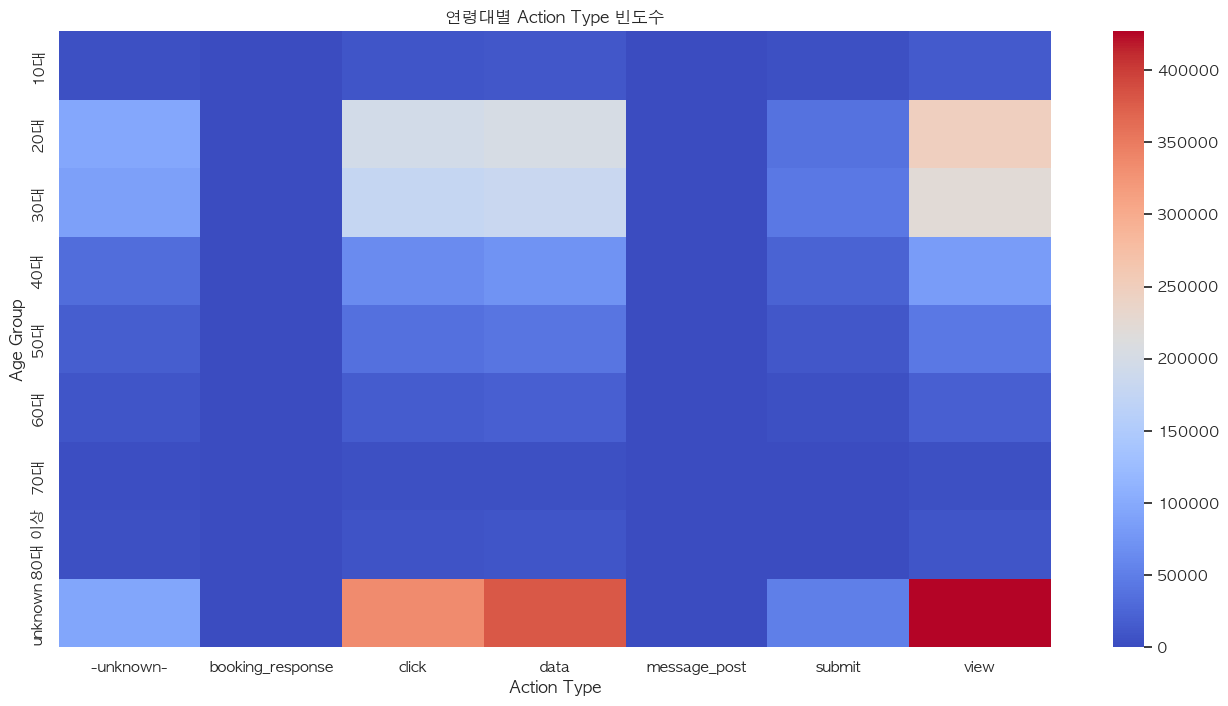

In [71]:
# 연령대별 action_type 빈도수 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(age_action_type_count, cmap='coolwarm')
plt.title('연령대별 Action Type 빈도수')
plt.xlabel('Action Type')
plt.ylabel('Age Group')
plt.show()

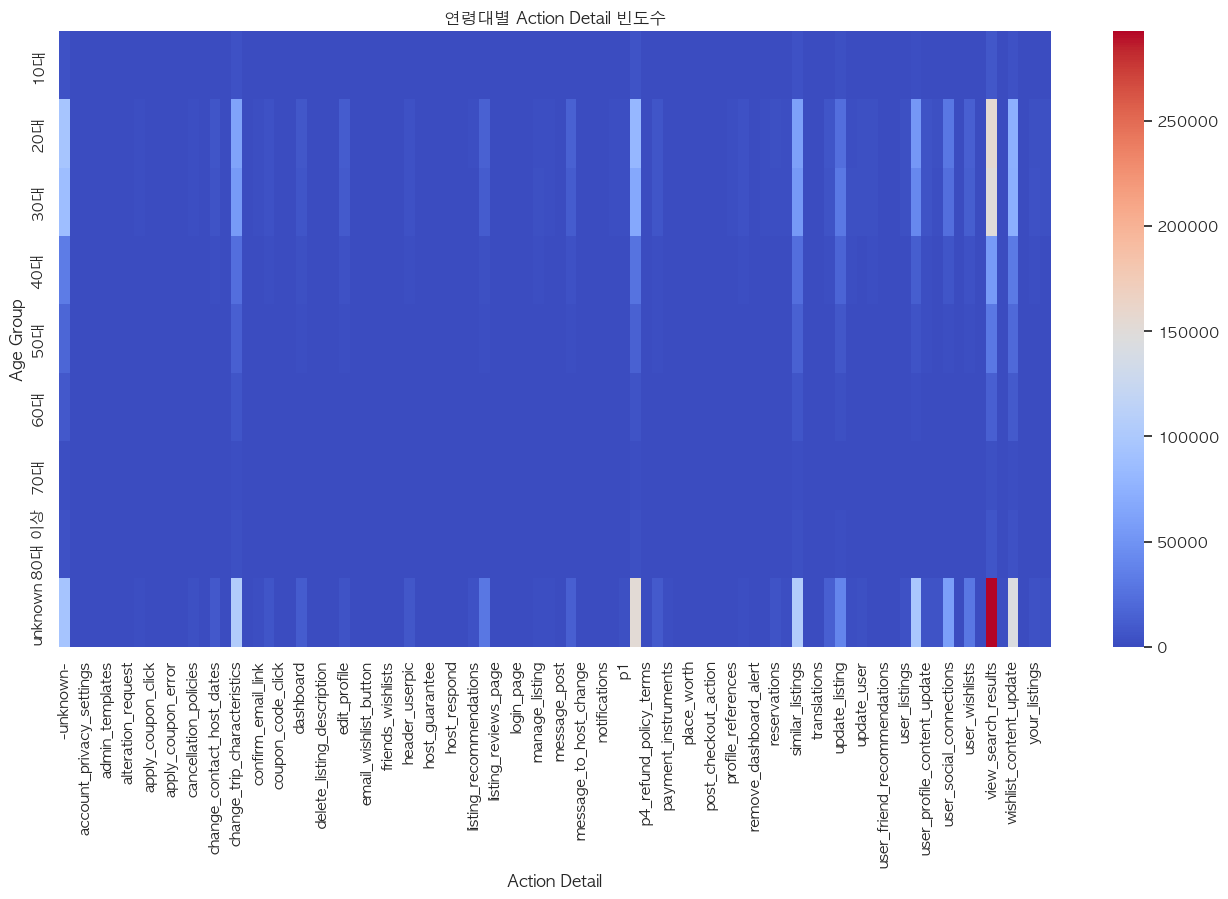

In [72]:
# 연령대별 action_detail 빈도수 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(age_action_detail_count, cmap='coolwarm')
plt.title('연령대별 Action Detail 빈도수')
plt.xlabel('Action Detail')
plt.ylabel('Age Group')
plt.show()

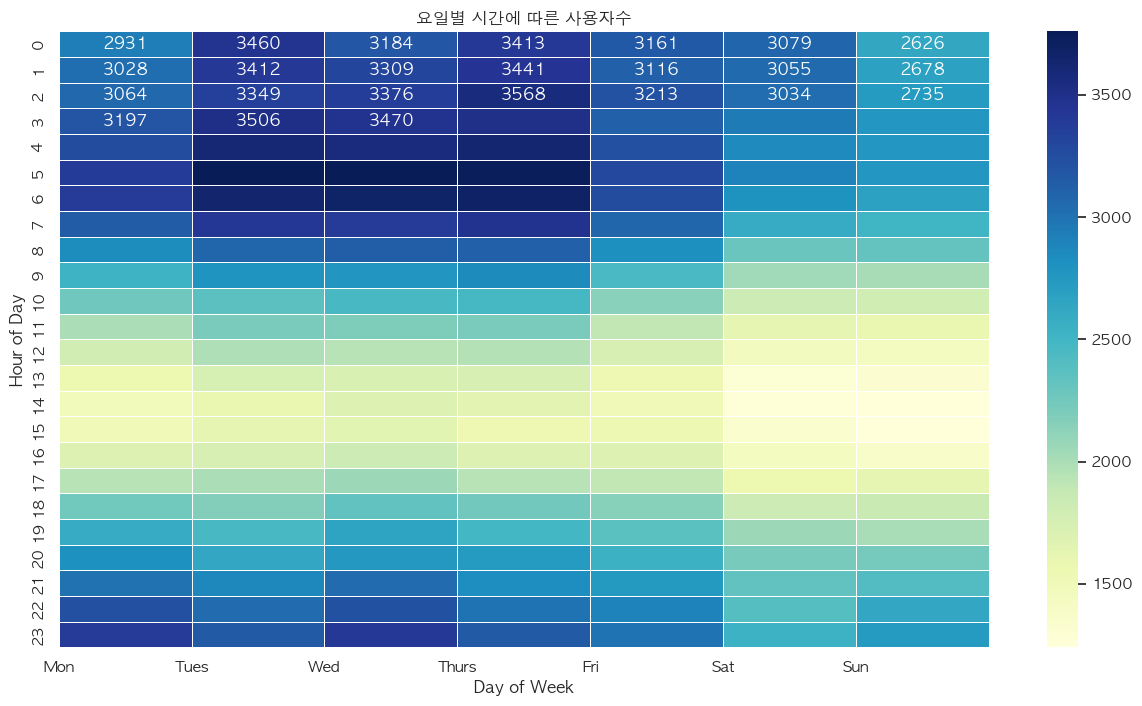

In [73]:
## 요일별, 시간대별 사용자수 구하기

# 요일별, 시간별로 그룹화 -> 각 그룹 내 고유한 사용자수 집계
week_hour_user = users_session_df.groupby([users_session_df['session_timestamp'].dt.hour, users_session_df['session_timestamp'].dt.weekday])['user_id'].nunique()


# 그룹화된 데이터를 피벗테이블 형태로 변환(행: 시간, 열: 요일)
# unstack은 다중 인덱스를 가진 데이터프레임을 사용할 때 하나의 인덱스를 컬럼으로 변환할 수 있음
week_hour_user = week_hour_user.unstack()

# 히트맵으로 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(data = week_hour_user, cmap='YlGnBu', annot = True, fmt = 'd', linewidths=0.5)
plt.title('요일별 시간에 따른 사용자수')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.show()

#### 요일별 시간대에 따른 사용자 수 히트맵
- 사용자 수는 주로 낮 시간대(8시~18시)에 집중되어 있으며, 야간 시간대(0시~6시)에는 상대적으로 사용자 수가 적다.
- 주중에는 사용자 수가 일정한 패턴을 보이는 반면, 주말에는 약간의 변화가 있었다.
- 화요일과 수요일의 사용자 수가 상대적으로 많았다. 특히, 수요일의 0시3시 시간대와 8시17시 시간대에 사용자 수가 많은 것을 알 수 있다.
- 반면, 일요일에는 다른 요일보다 전반적으로 사용자 수가 적은데, 특히 0시~3시 시간대와 20시 이후의 시간대에 사용자 수가 적은 것을 알 수 있다.
- 오전 8시부터 오후 6시까지는 모든 요일에서 사용자 수가 많다. 이는 사용자가 주로 업무 시간대에 플랫폼을 많이 이용한다고 해석할 수 있다.
- 야간 시간대(0시6시)와 늦은 저녁 시간대(20시23시)에는 사용자 수가 적다. 이는 사용자가 주로 휴식을 취하는 시간대임을 추측할 수 있다.

##### 인사이트 도출
- 액션 플랜 : 사용자가 많은 시간대(8시~18시)에 맞춰 할인 쿠폰이나 이벤트를 진행하면 사용자 참여도를 높일 수 있을 것이다. 반면, 사용자 수가 적은 시간대(0시~6시)에 대한 야간 시간대에만 적용되는 타임 특가 이벤트를 통해 해당 시간대의 사용자 수를 증가시킬 수 있을 것이다.
- 서버 및 인프라 관리 : 사용자가 많은 시간대에는 서버 및 인프라 자원을 충분히 확보하여 서비스의 안정성을 유지하는 것이 중요하다. 특히, 화요일과 수요일 오전 시간대에는 트래픽이 많을 수 있으므로 대비가 필요할 것이다. 사용자 수가 적은 시간대에는 서버 자원을 최적화하여 운영 비용을 절감할 수 있다.
- 주중과 주말의 사용자 행동 패턴이 다를 수 있으므로, 이를 반영한 사용자 경험(UX) 개선 방안을 마련할 수 있다. 예를 들어, 주말에는 휴식 및 레저 관련 콘텐츠를 강조하는 것이 효과적일 것이다.

# 월별 이탈률

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1458/2239168189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_session_df['month'] = users_session_df['session_timestamp'].dt.to_period('M')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


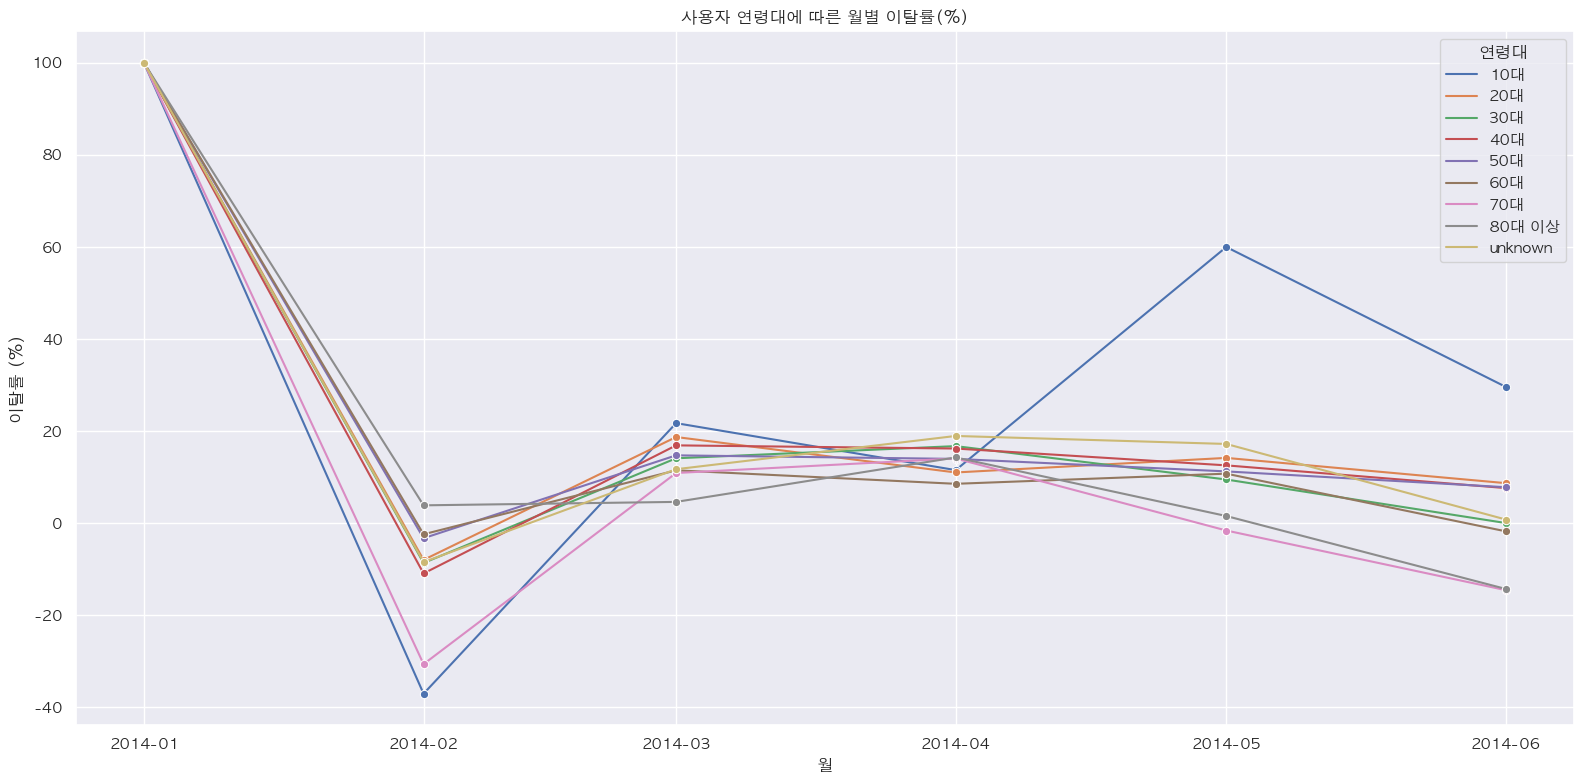

In [17]:
# 2014년 6월까지 데이터 필터링
users_session_df['month'] = users_session_df['session_timestamp'].dt.to_period('M')
filtered_df = users_session_df[users_session_df['month'] <= '2014-06']

# 월별 활성 사용자 테이블 생성
monthly_active_users = filtered_df.groupby(['user_id', 'month', 'age_group']).size().reset_index(name='counts')

# 현재 월의 활성 사용자 계산
current_month_users = monthly_active_users.groupby(['month', 'age_group']).agg({'user_id': 'count'}).reset_index()

# 다음 월의 활성 사용자
next_month_users = monthly_active_users.copy()
next_month_users['month'] = next_month_users['month'] + 1
next_month_users = next_month_users.groupby(['month', 'age_group']).agg({'user_id': 'count'}).reset_index()

# age_group 컬럼 데이터 타입 문자열로 변환 (데이터 병합시 데이터 타입 불일치 문제 방지 목적)
current_month_users['age_group'] = current_month_users['age_group'].astype(str)
next_month_users['age_group'] = next_month_users['age_group'].astype(str)

# 현재 월과 다음 월 데이터 병합
churn_df = current_month_users.merge(next_month_users, on=['month', 'age_group'], suffixes=('_current', '_next'), how='left').fillna(0)

# 이탈률 계산 = (현재 월의 사용자 수 - 다음 월의 사용자 수) / (현재 월의 사용자 수) * 100
churn_df['churn_rate'] = (churn_df['user_id_current'] - churn_df['user_id_next']) / churn_df['user_id_current'] * 100
churn_df['month'] = churn_df['month'].dt.to_timestamp() # month 컬럼 값을 타임 스탬프로 변환


# 시각화
plt.figure(figsize=(16, 8))
sns.lineplot(data=churn_df, x='month', y='churn_rate', hue='age_group', marker='o')

plt.title('사용자 연령대에 따른 월별 이탈률(%)')
plt.xlabel('월')
plt.ylabel('이탈률 (%)')
plt.legend(title='연령대')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 사용자 연령대에 따른 월별 이탈률

(1월은 데이터 수집 시작 시점이기 때문에 모든 사용자가 이탈한 것 처럼 보이므로 2월부터 해석)
- 2014년 2월부터 이탈률이 급격히 감소하는 것으로 보아, 1월에 가입한 사용자들이 2월에 재방문했음을 시사한다.
- 10대: 2014년 2월에는 이탈률이 -40%로 가장 낮았으나, 이후 3월부터 점차 상승하여 6월에는 이탈률이 40%로 급격히 증가했다.
- 20대, 30대, 40대, 50대: 이 연령대의 이탈률은 2014년 2월부터 6월까지 비교적 안정적인 패턴을 보이며, 0%에 근접한 이탈률을 유지하고 있습니다.
- 60대, 70대, 80대 이상: 이 연령대의 이탈률은 2014년 2월에 급격히 감소하였으나, 이후 다른 연령대보다 더 낮은 이탈률을 유지하고 있다.
- unknown: 나이가 알려지지 않은 사용자들의 이탈률도 2월에 급격히 감소하였으나, 이후 점진적으로 감소했다.
- 2014년 2월의 경우 모든 연령대에서 이탈률이 급격히 감소하는 패턴을 보이며, 이는 2월에 많은 사용자가 재방문했음을 의미한다.
- 2014년 5월에는 10대 연령대의 이탈률이 다른 연령대에 비해 급격히 증가하는 패턴을 보이며, 이는 이 시기에 10대 사용자들의 이탈률이 특히 높았음을 나타낸다.

##### 인사이트 도출
- 액션 플랜 : 10대 사용자의 이탈률이 높아지는 2014년 5월과 6월을 타겟으로 한 재방문 유도 캠페인을 진행하는 것이 필요하다. 이탈률이 높아지는 시기에 맞춰 맞춤형 혜택을 제공하는 전략이 효과적일 수 있겠다. 20대부터 50대까지의 안정적인 이탈률을 유지하고 있는 연령대를 대상으로 유지 보수 캠페인을 통해 충성도를 강화할 수 있을 것이다.
- UX 개선 측면 : 10대 사용자의 이탈률이 높은 시기에 맞춰 사용자의 피드백을 수집하고, 이들의 경험을 개선할 수 있는 기능을 추가하는 것이 중요하다. 나이가 알려지지 않은 사용자들(`Unknown`)의 경험을 개선하기 위해 나이 정보를 더 잘 수집할 수 있는 방법을 도입하는 것도 고려해볼 수 있겠다.
- 특정 연령대 타겟팅 : 60대 이상의 사용자들의 이탈률이 낮기 때문에, 각 연령대별로 맞춤형 서비스를 제공하여 이탈률을 낮추는 것이 필요하다.

In [18]:
churn_df

,month,age_group,user_id_current,user_id_next,churn_rate
0,2014-01-01,10대,74,0.0,100.000000
1,2014-01-01,20대,1870,0.0,100.000000
2,2014-01-01,30대,1925,0.0,100.000000
3,2014-01-01,40대,752,0.0,100.000000
4,2014-01-01,50대,412,0.0,100.000000
5,2014-01-01,60대,213,0.0,100.000000
6,2014-01-01,70대,64,0.0,100.000000
7,2014-01-01,80대 이상,99,0.0,100.000000
8,2014-01-01,unknown,4081,0.0,100.000000
9,2014-02-01,10대,54,74.0,-37.037037


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


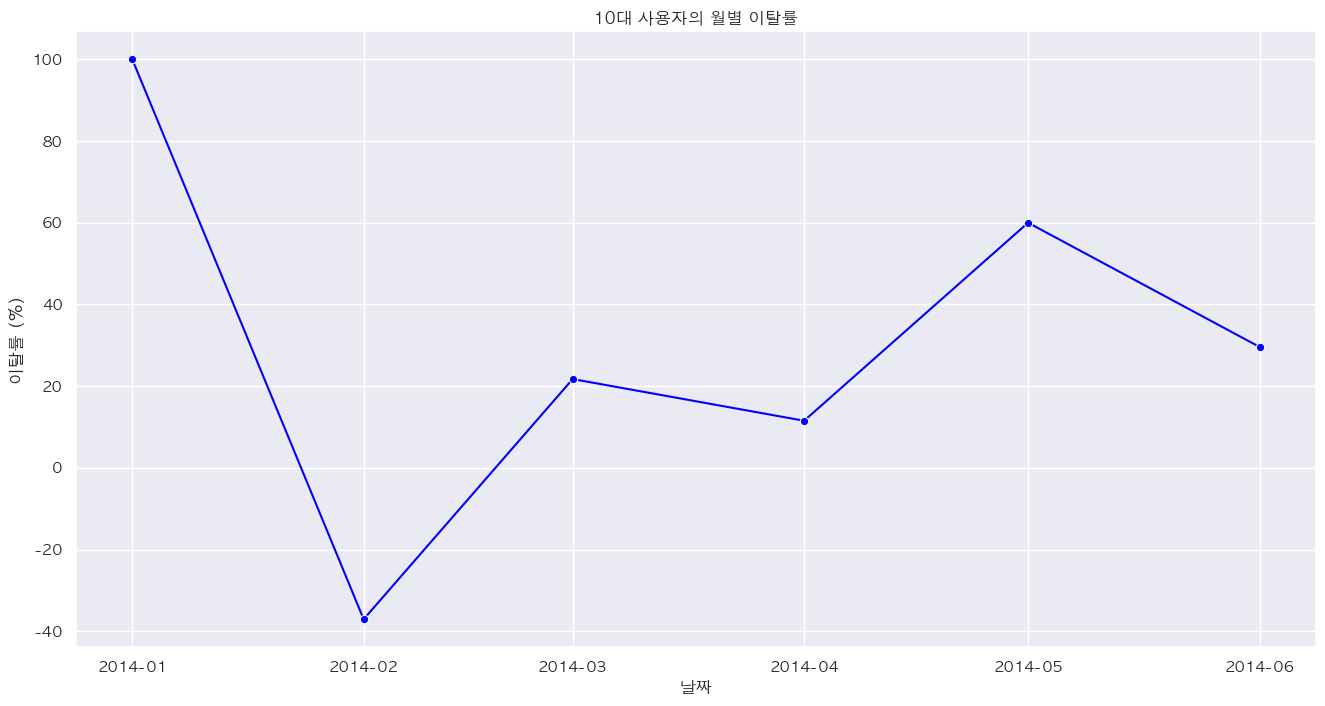

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


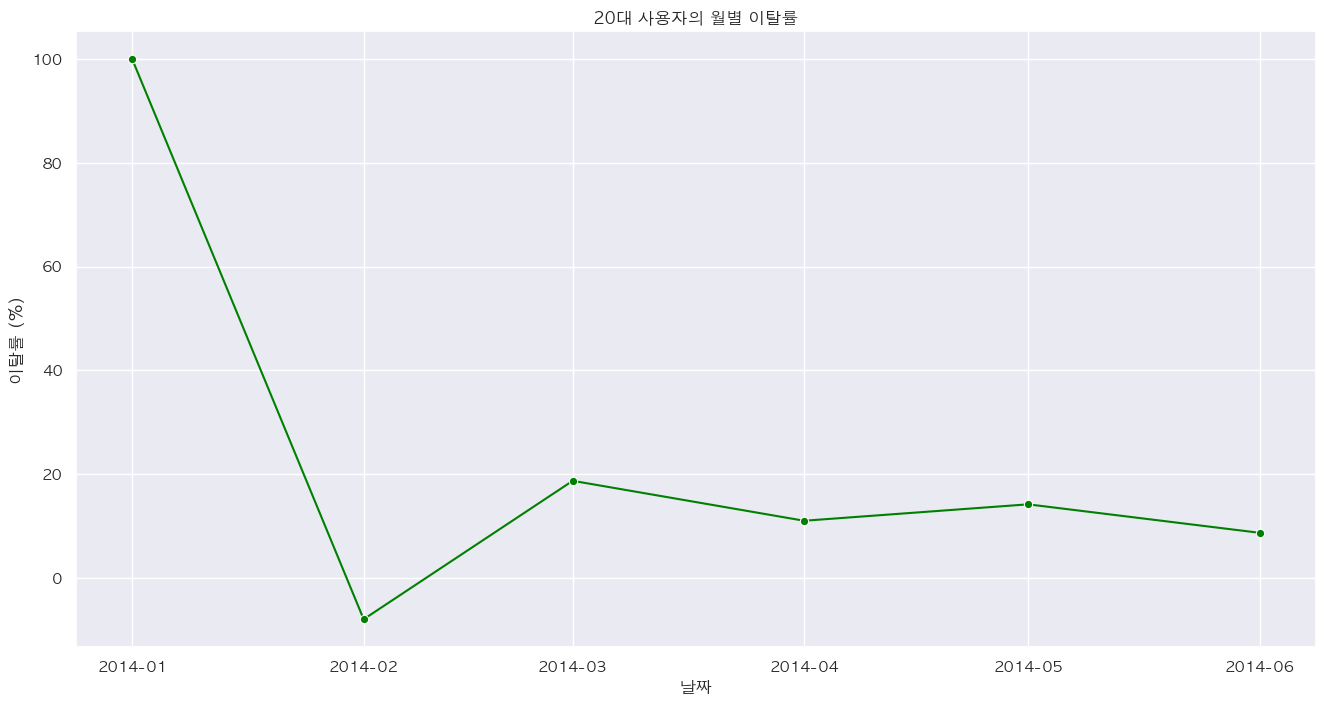

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


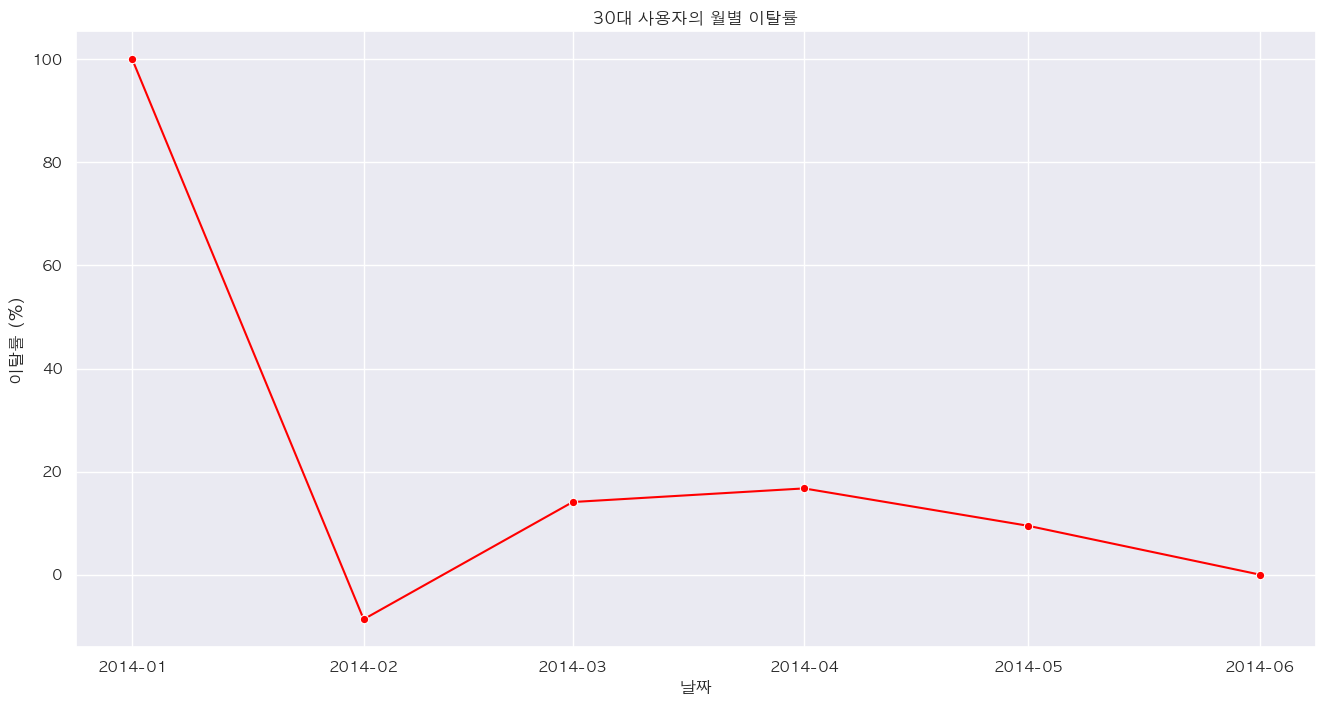

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


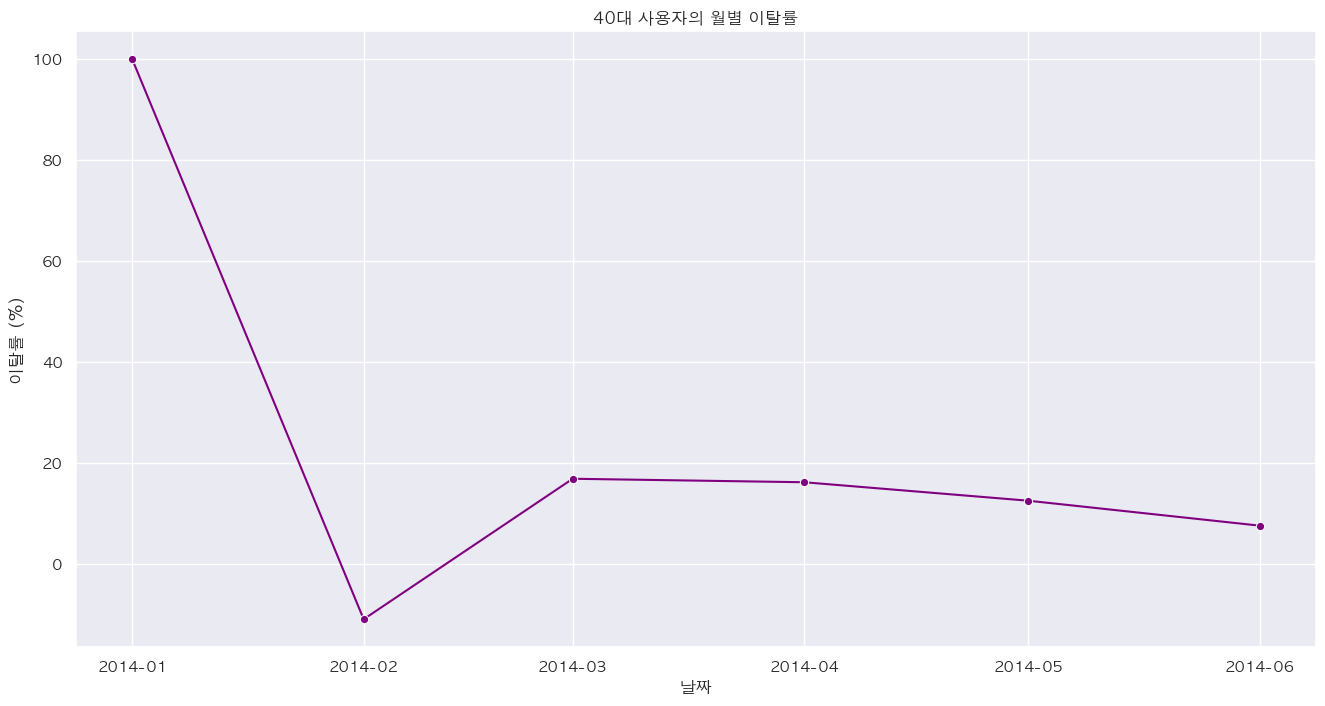

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


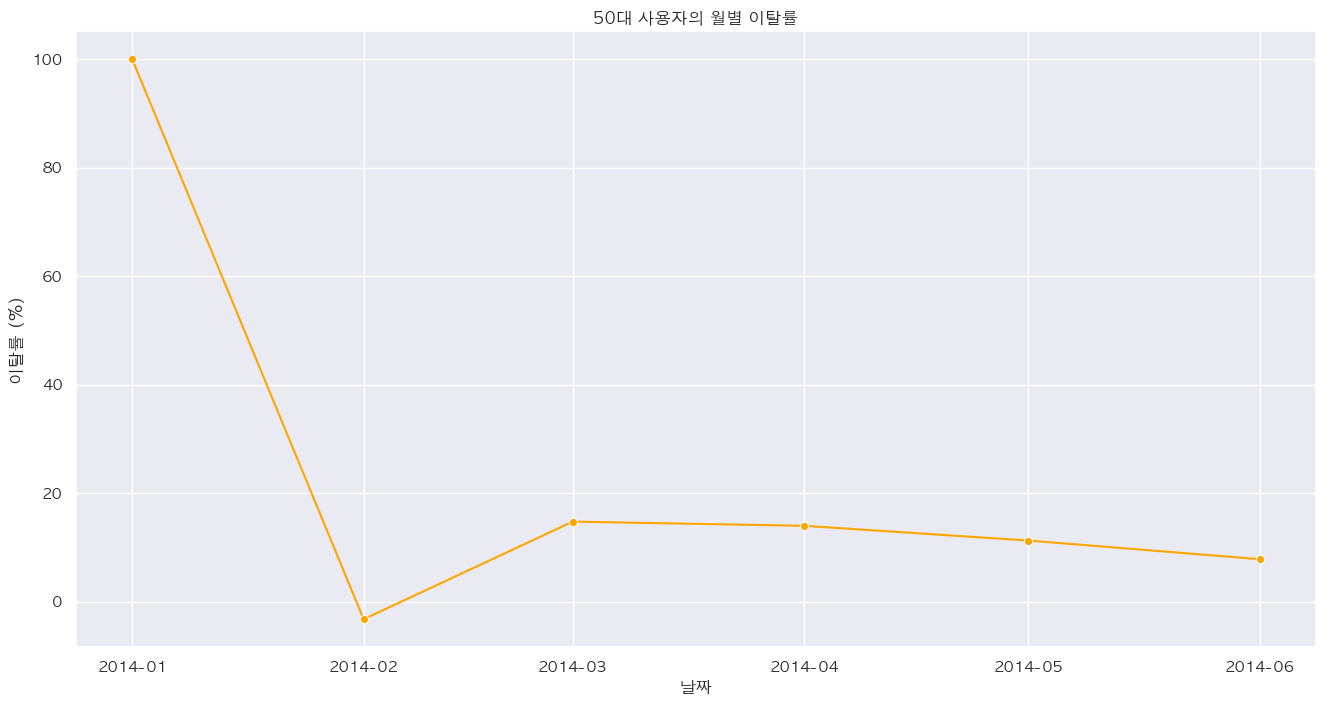

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


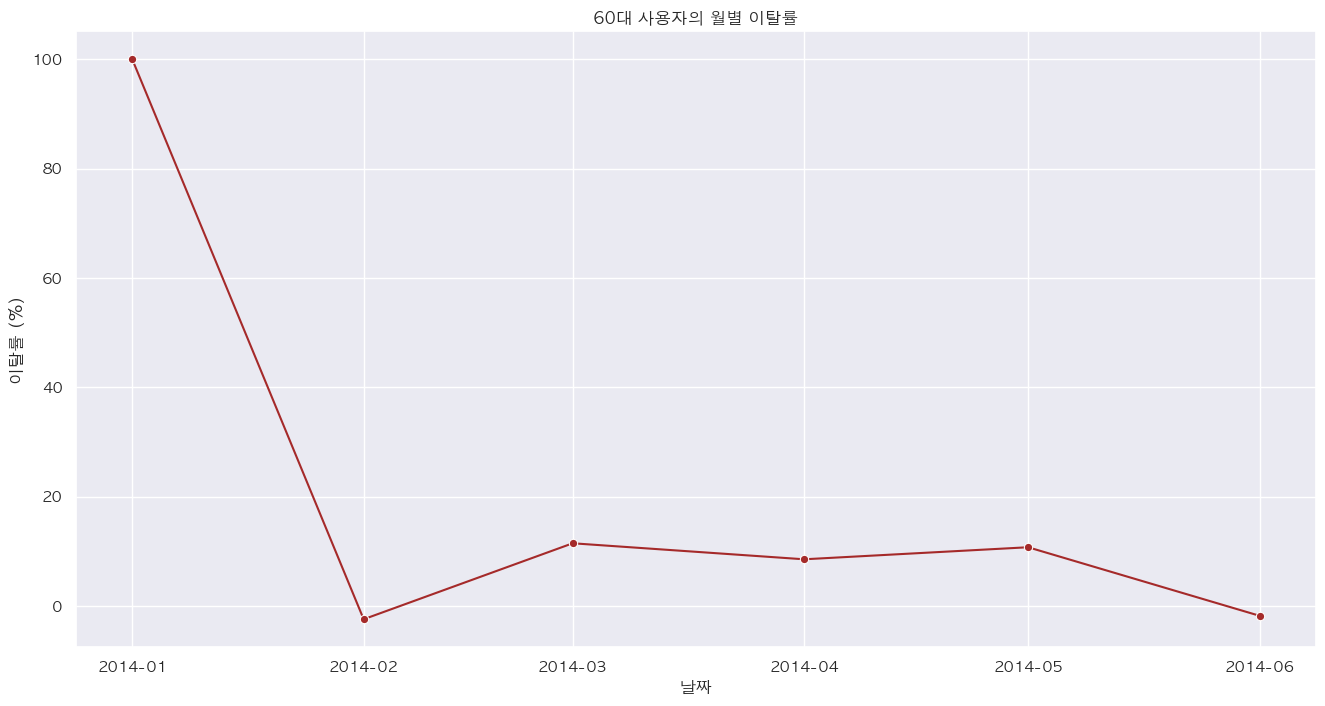

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


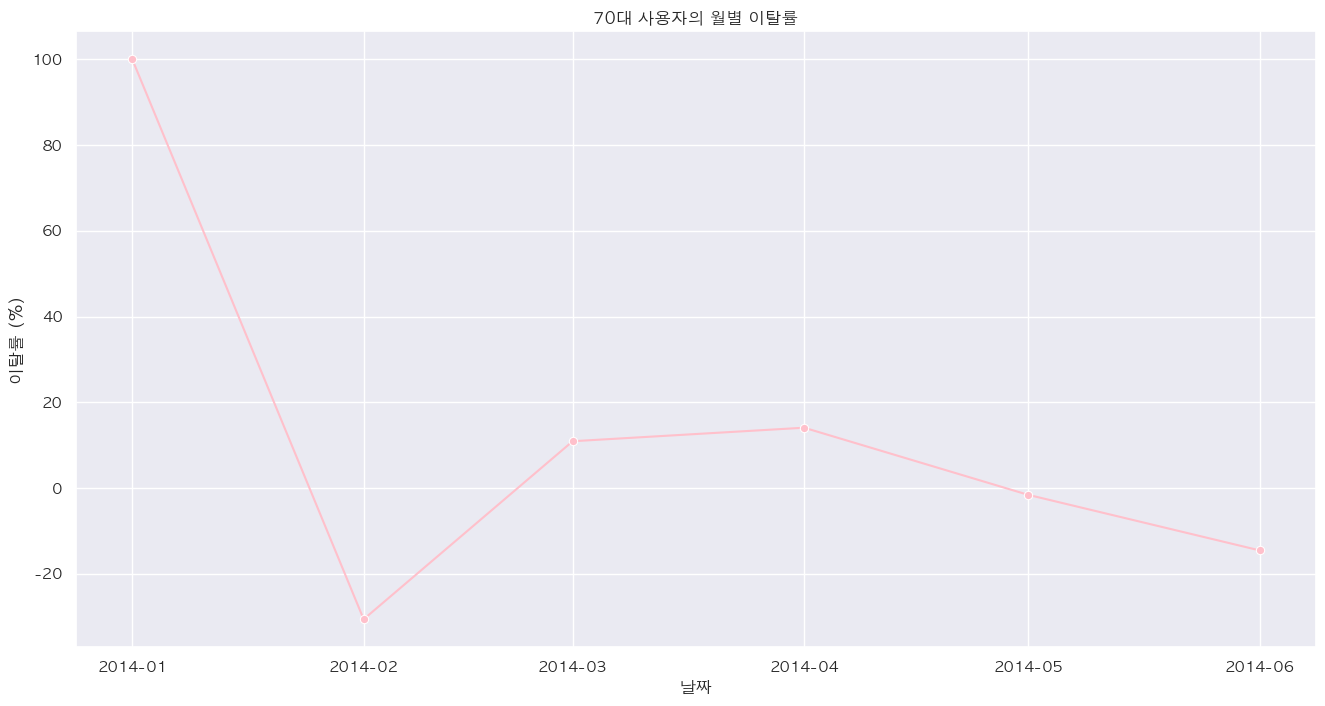

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


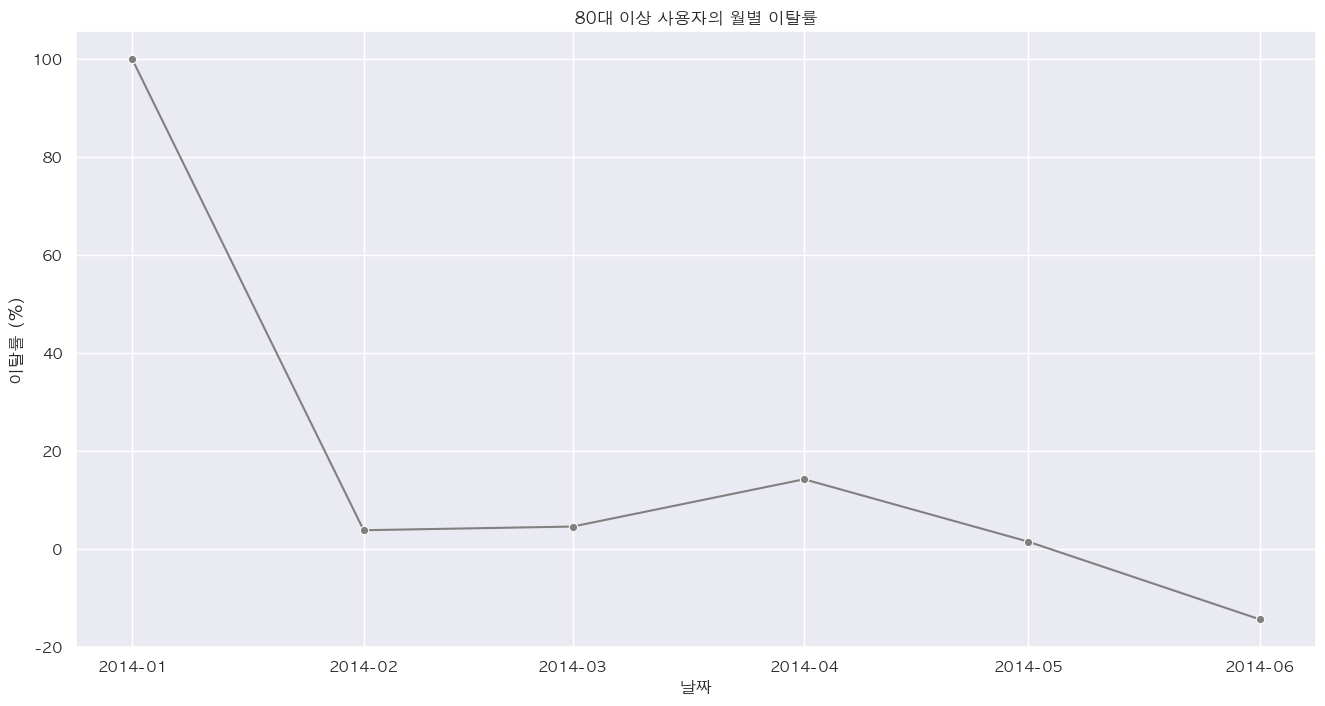

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


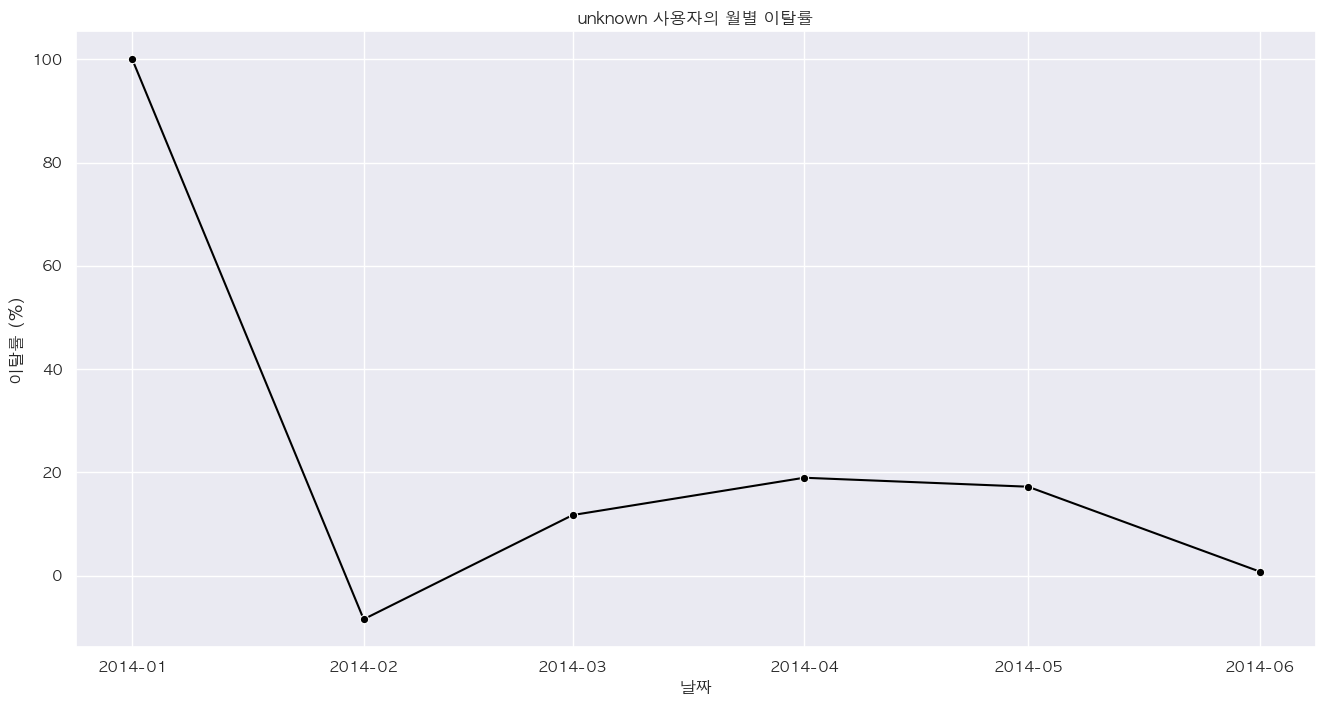

In [19]:
## 연령대별로 월별 이탈률 그래프 따로 살펴보기

# 색상 설정
colors = {
    '10대': 'blue',
    '20대': 'green',
    '30대': 'red',
    '40대': 'purple',
    '50대': 'orange',
    '60대': 'brown',
    '70대': 'pink',
    '80대 이상': 'gray',
    'unknown': 'black'
}



age_groups = churn_df['age_group'].unique()

for age_group in age_groups:
    plt.figure(figsize=(16, 8))
    sns.lineplot(data=churn_df[churn_df['age_group'] == age_group], x='month', y='churn_rate', color=colors[age_group], marker='o')
    
    plt.title(f'{age_group} 사용자의 월별 이탈률')
    plt.xlabel('날짜')
    plt.ylabel('이탈률 (%)')
    plt.grid(True)
    plt.show()

# 10대 유저 이탈 원인 분석

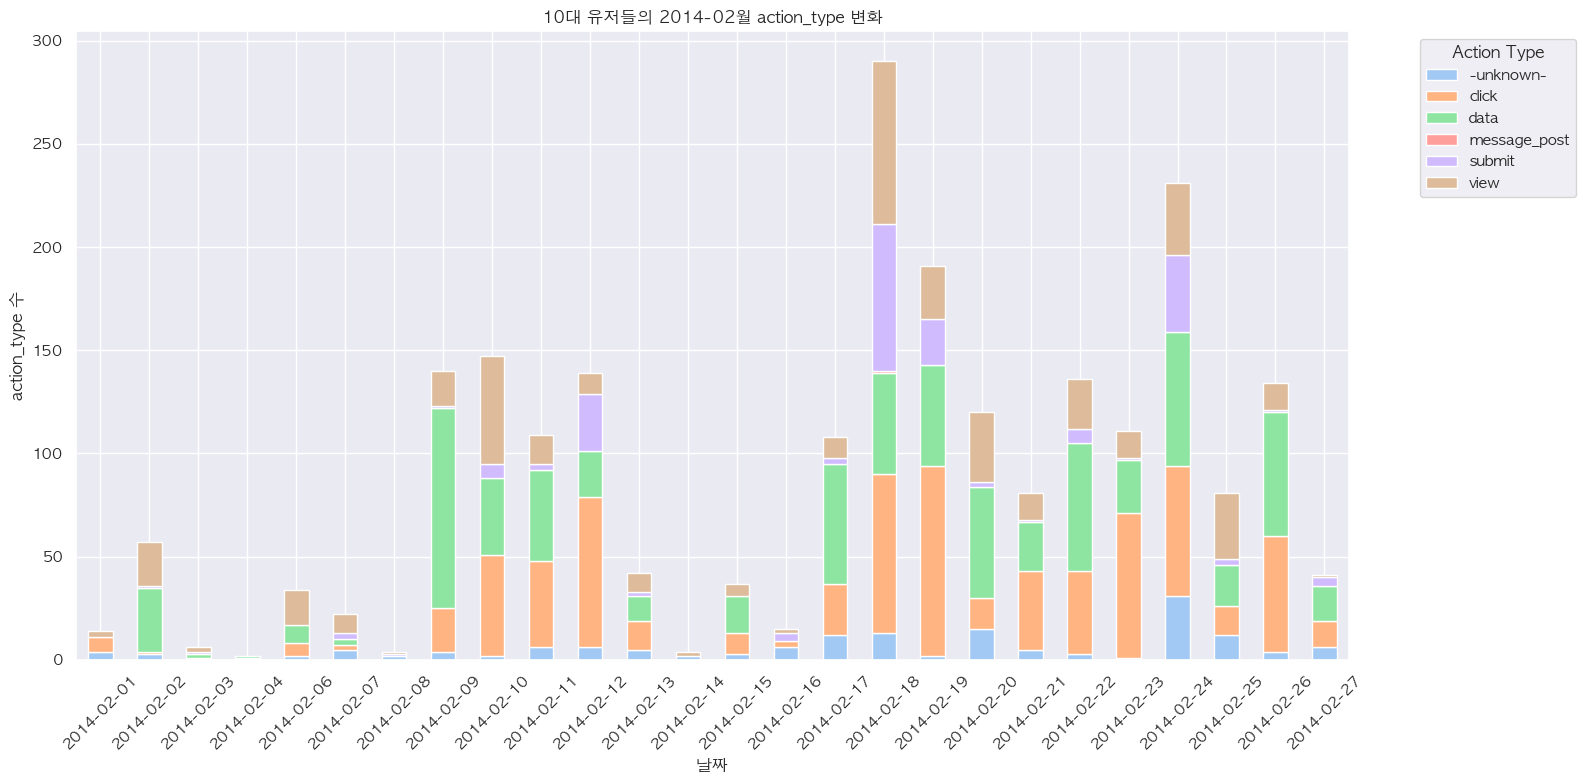

In [20]:
## 10대 유저들의 2014년 2월 action_type별 분포 변화 파악

# 필요한 데이터 필터링
teen_action_df = users_session_df[(users_session_df['age_group'] == '10대') & 
                           (users_session_df['session_timestamp'] >= '2014-02-01') & 
                           (users_session_df['session_timestamp'] <= '2014-02-28')]

# 날짜별, action_type별로 그룹화하여 count 계산
action_count = teen_action_df.groupby([teen_action_df['session_timestamp'].dt.date, 'action_type']).size().unstack(fill_value=0)

# 그래프 설정
fig, ax = plt.subplots(figsize=(16, 8))

# Stacked bar chart 그리기 (파스텔 톤 적용)
pastel_colors = sns.color_palette("pastel")
action_count.plot(kind='bar', stacked=True, ax=ax, color=pastel_colors)

plt.title('10대 유저들의 2014-02월 action_type 변화')
plt.xlabel('날짜')
plt.ylabel('action_type 수')
plt.xticks(rotation=45)
plt.legend(title='Action Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 10대 유저들의 2014년 2월 action_type 분포 변화
2014년 2월에서 3월로 넘어갈 때 이탈률이 급격히 증가했기 때문에, 2014년 2월을 집중적으로 분석해보았다.

- `view`, `click`, `data`: 이 세 가지 action_type이 10대 사용자들의 활동 중 가장 큰 비중을 차지하고 있다. 특히 `view`와 `click` 활동이 많은 빈도를 보인다.
- `submit`: 특정 날짜(예: 2014-02-17)에는 submit 활동이 급격히 증가했는데, 이는 사용자가 특정 시점에 활발히 참여하거나, 서비스에 중요한 이벤트가 있었음을 시사한다.
- 2월 초 (2014-02-01 ~ 2014-02-07): 이 기간 동안의 활동 빈도는 비교적 낮다. 이는 사용자가 새로운 활동에 적응하는 기간일 수 있다.
- 2월 중순 (2014-02-08 ~ 2014-02-17): 이 시기에는 활동 빈도가 급격히 증가합니다. 특히 2014-02-09, 2014-02-10, 2014-02-17에 활동 빈도가 최고조에 달했다. 이는 이벤트나 마케팅 캠페인이 영향을 미쳤을 가능성이 있다.
- 2월 후반 (2014-02-18 ~ 2014-02-28): 이 기간에도 높은 활동 빈도가 유지되지만, 중순에 비해 다소 감소했다. 특히 2014-02-18과 2014-02-24에 활동이 집중되었다.
- 2014-02-09, 2014-02-10, 2014-02-17, 2014-02-18: 이 날짜들에는 특히 `view`와 `click` 활동이 많았는데, 이는 사용자가 특정 콘텐츠나 기능을 많이 탐색했음을 나타낸다.

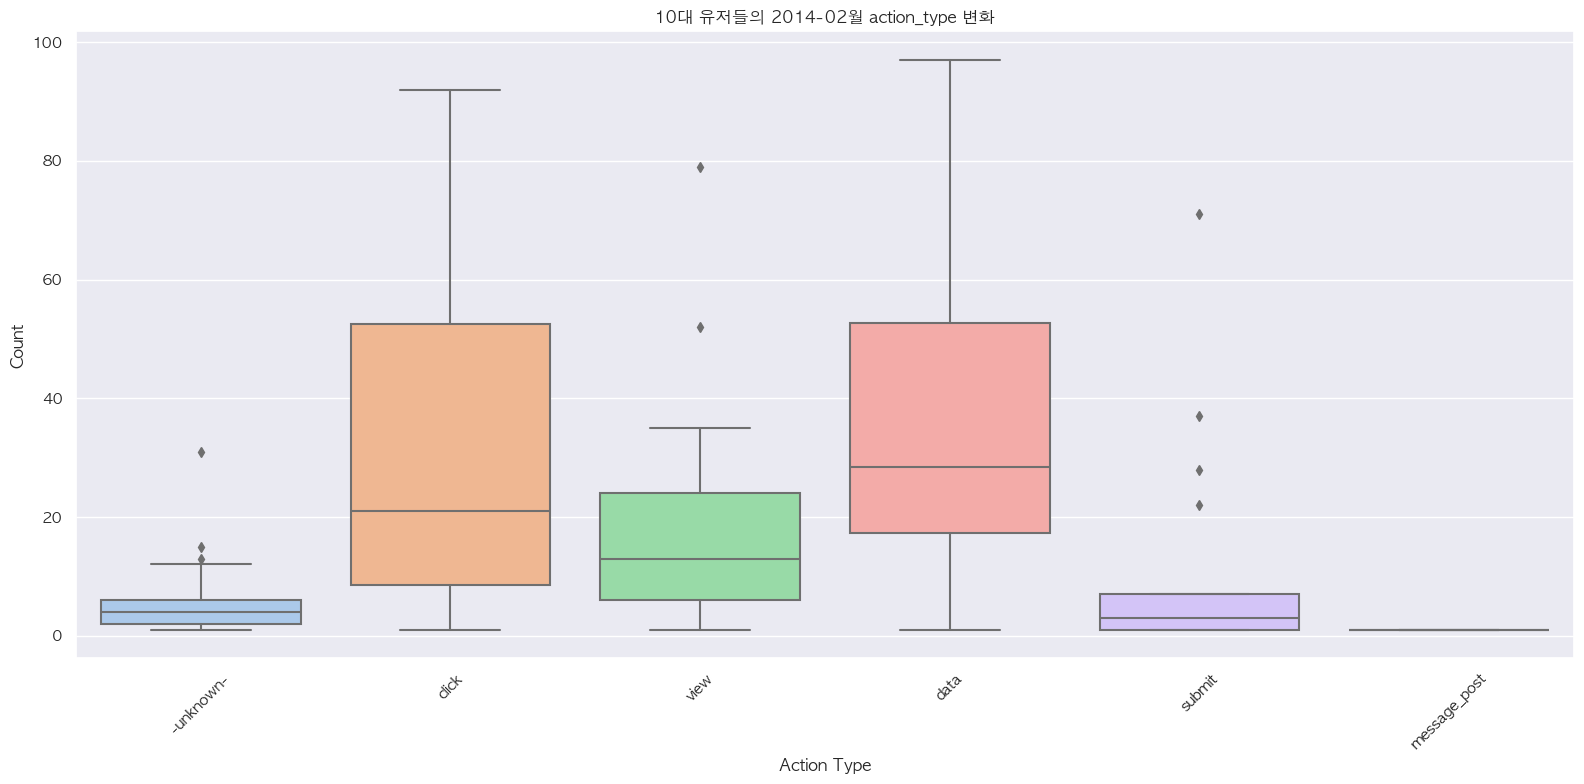

In [36]:
## 10대 유저들의 2014년 2월 action_type에 대한 boxplot

# 날짜별, action_type별로 그룹화하여 count 계산
action_count = teen_action_df.groupby([teen_action_df['session_timestamp'].dt.date, 'action_type']).size().reset_index(name='count')

# 그래프 설정
sns.set_palette("pastel")

plt.figure(figsize=(16, 8))

# Boxplot 그리기
sns.boxplot(x='action_type', y='count', data=action_count)
plt.title('10대 유저들의 2014-02월 action_type 변화')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 이탈률이 급증했던 3월 이전 2월의 10대 유저들의 일별 action_type 변화와 전체적인 분포를 파악해보았다.
- 10대의 경우 예약과 관련된 이벤트보다는 data, click, view와 같은 서치 및 뷰와 관련된 이벤트가 많았다.
- 10대 유저의 경우 경제적 독립이 이루어지지 않은 유저들이 대부분이기 때문에 예약과 관련된 이벤트는 적을 것으로 추측된다.

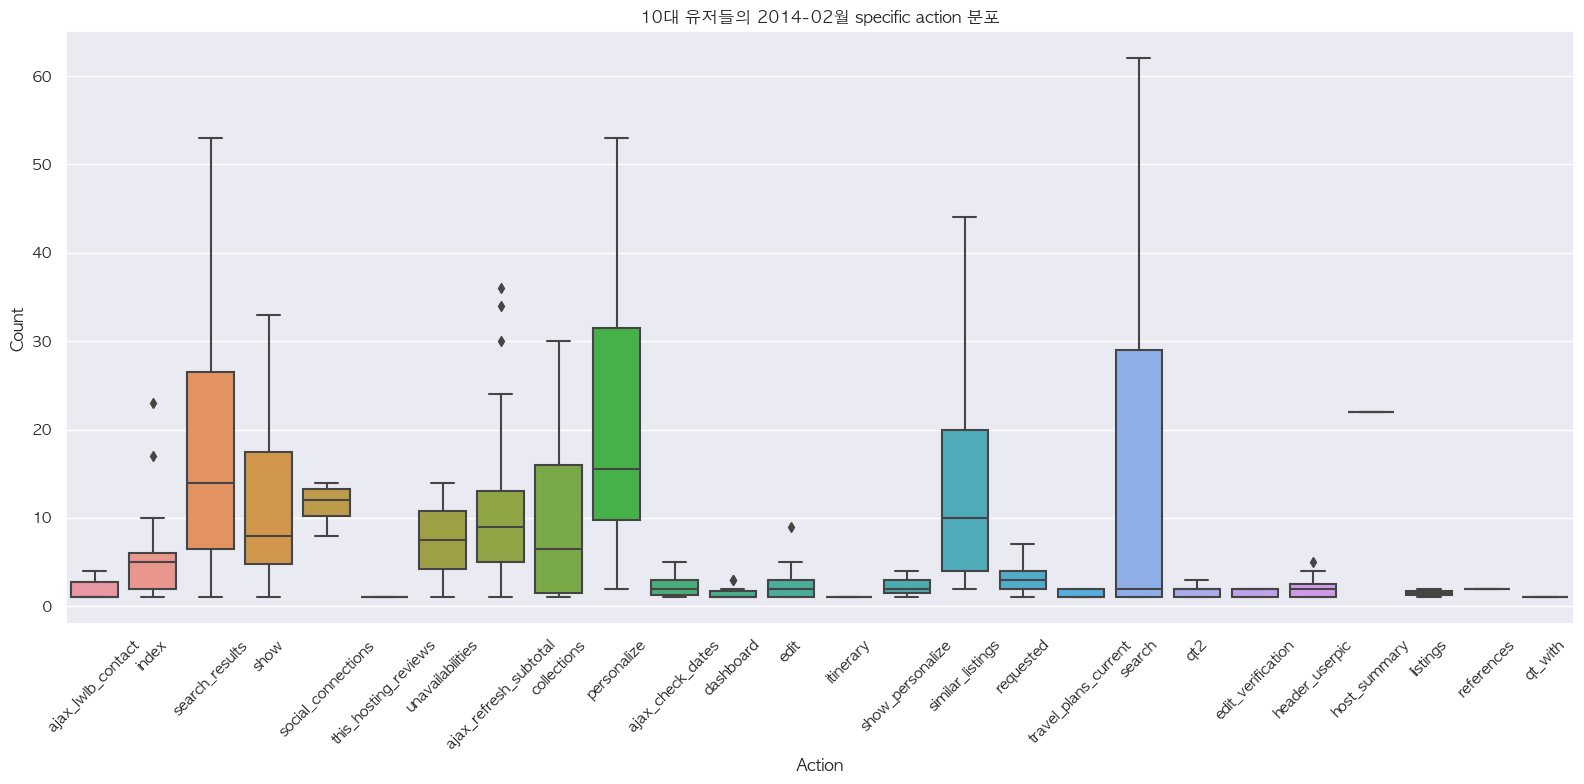

In [22]:
## action_type = data, click, view인 action 살펴보기

# 필요한 데이터 필터링
teen_specific_action_df = users_session_df[(users_session_df['age_group'] == '10대') & 
                                    (users_session_df['session_timestamp'] >= '2014-02-01') & 
                                    (users_session_df['session_timestamp'] <= '2014-02-28') & 
                                    (users_session_df['action_type'].isin(['data', 'click', 'view']))]

# 날짜별, action 별로 그룹화하여 count 계산
specific_action_count = teen_specific_action_df.groupby([teen_specific_action_df['session_timestamp'].dt.date, 'action']).size().reset_index(name='count')

# 그래프 설정
plt.figure(figsize=(16, 8))

# Boxplot 그리기
sns.boxplot(x='action', y='count', data=specific_action_count)
plt.title('10대 유저들의 2014-02월 specific action 분포')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 0대 사용자들의 2014년 2월 action_type이 data, click, view에 해당하는 action의 분포

- `ajax_lwlb_contact`, `itinerary`, `travel_plans_current`, `ajax_check_dates` 등 몇 가지 action의 중앙값은 낮은 편이다.
- `search_results`, `personalize`, `similar_listings` 등의 IQR이 큰 편이며, 이는 해당 action에서 사용자의 활동 정도에 변동이 크다는 것을 의미한다.
- `search_results`, `ajax_check_dates`, `requested` 등에서 여러 개의 이상치가 관찰되었다. 이는 일부 사용자가 이러한 action을 다른 사용자들보다 훨씬 더 많이 수행했음을 나타낸다.
- `similar_listings`, `ajax_offers_subtotal`, `personalize` 등도 활동 빈도가 높은 편이며, 분포가 넓다.

##### 인사이트 도출
- 10대 사용자들이 `search_results`, `ajax_offers_subtotal`, `personalize` 등의 action을 많이 수행하고 있음을 알 수 있었다.
이러한 action들은 사용자들이 플랫폼에서 적극적으로 정보를 탐색하거나 개인화된 추천을 받는 것과 관련있다.
- `search_results`, `personalize`, `similar_listings` 등의 action에서 활동 빈도가 높고 분포가 넓다는 것은, 10대 사용자들이 에어비앤비에서 다양한 옵션을 탐색하는 데 많은 시간을 할애하고 있다는 것을 시사한다. 이러한 탐색 활동이 많을수록 사용자가 예약을 완료하는 데 필요한 정보를 충분히 얻고 있음을 나타낼 수 있다.
- 액션 플랜 : `search_results`와 `similar_listings` 같은 주요 탐색 action에서의 경험을 개선하면, 사용자 만족도를 높이고 이탈률을 낮출 수 있는 가능성이 있어 보인다. 예를 들어, 검색 결과의 관련성을 높이거나 개인화된 추천 시스템을 강화하는 것이 도움이 될 수 있을 것이다.

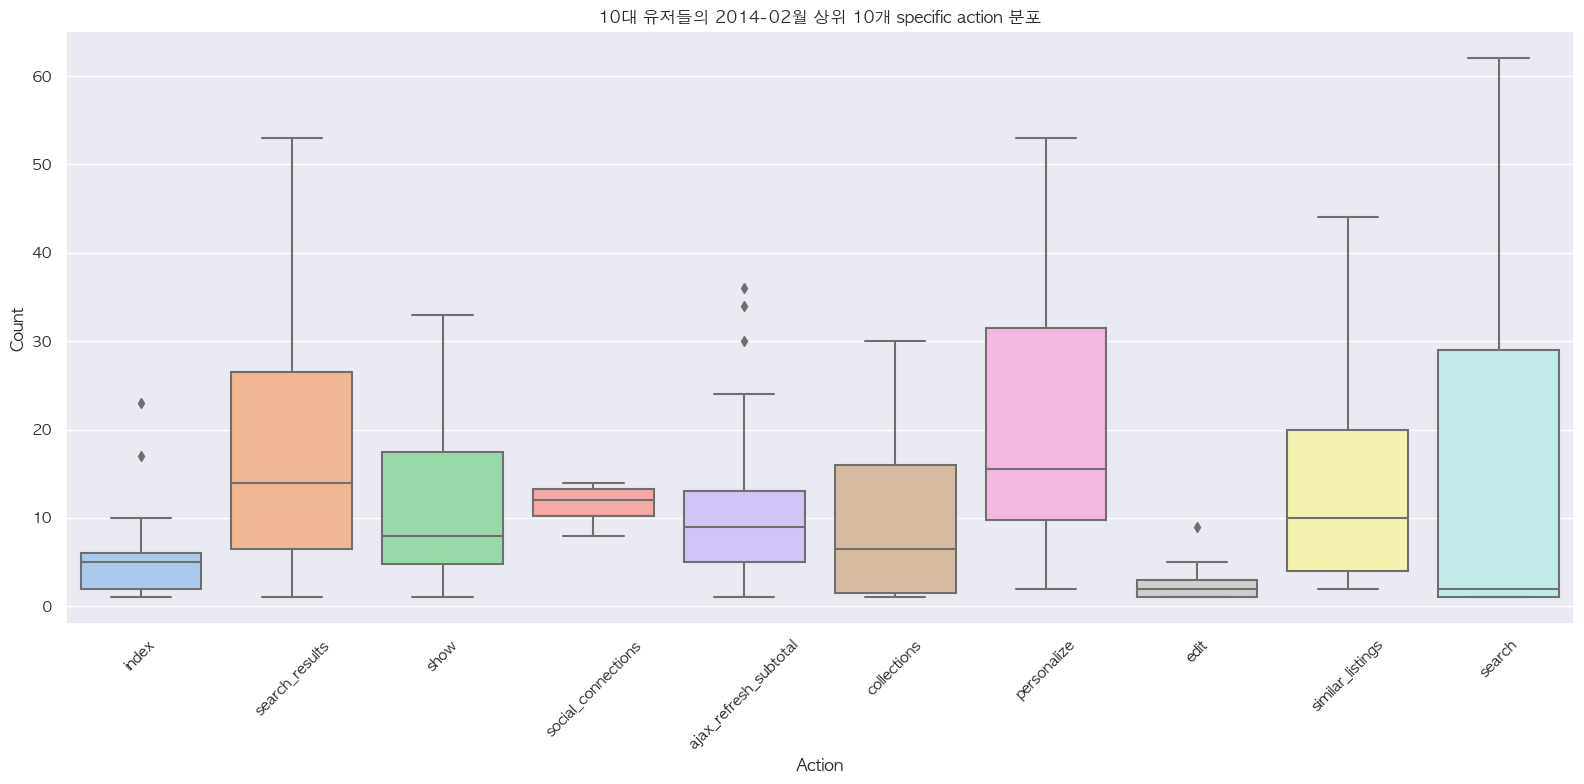

In [37]:
## 평균 기준으로 상위 10개 action에 대한 박스 플롯 시각화

# action 별 평균값 계산
action_mean = teen_specific_action_df.groupby('action').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

# 상위 10개의 action 필터링
top_actions = action_mean['action'].tolist()
filtered_teen_specific_action_df = teen_specific_action_df[teen_specific_action_df['action'].isin(top_actions)]

# 날짜별, action 별로 그룹화하여 count 계산
specific_action_count = filtered_teen_specific_action_df.groupby([filtered_teen_specific_action_df['session_timestamp'].dt.date, 'action']).size().reset_index(name='count')

# 그래프 설정
plt.figure(figsize=(16, 8))

# Boxplot 그리기
sns.boxplot(x='action', y='count', data=specific_action_count)
plt.title('ㅠ')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 10대 유저들의 2014-02월 상위 10개 specific action 분포 box plot
- 주요 활동 : `search_results`, `personalize`, `search`는 중앙값이 높고 활동 빈도가 많은 주요 활동으로 파악되었다. 이러한 활동에 대해 추가적인 사용자 경험 개선 및 기능 강화를 고려할 수 있다.
- 활동의 집중도: `index`와 `social_connections`, `ajax_refresh_subtotal`는 활동 빈도가 비교적 낮으며 집중도가 낮다. 이에 대해서는 사용자 참여를 유도하는 전략이 필요할 수 있을 것이다.
- 활동 빈도 분석: `edit`와 같은 활동은 매우 낮은 빈도를 보이기 때문에 해당 기능의 필요성에 대한 재평가가 필요할 것 같다.
- `similar_listings`와 `collections`는 비교적 낮은 빈도를 보이므로, 해당 기능의 개선 또는 사용자 안내를 통한 활성화가 필요할 것이다.

# 사용자 세그먼트에 따른 이탈률 분석

## (1) 사용자 세그먼트 분류

In [24]:
# 초를 일 단위로 변환
users_session_df['days_elapsed'] = users_session_df['secs_elapsed'] / 86400

# 반올림하여 정수로 변환
users_session_df['days_elapsed'] = np.floor(users_session_df['days_elapsed']).astype(int)

# 값 뒤에 '일 후 방문' 추가
users_session_df['days_elapsed'] = users_session_df['days_elapsed'].astype(str) + '일 후 방문'

users_session_df

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1458/1997885986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_session_df['days_elapsed'] = users_session_df['secs_elapsed'] / 86400
/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1458/1997885986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_session_df['days_elapsed'] = np.floor(users_session_df['days_elapsed']).astype(int)
/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1458/1997885986.py:8: SettingWith

,idx,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,session_timestamp,device_category,age_group,month,days_elapsed
0,1,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,2014-01-01 02:32:47,NaT,...,untracked,iOS,iPhone,-unknown-,NDF,2014-01-01 13:08:00,Phone,20대,2014-01,0일 후 방문
1,2,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01 17:33:17,2014-01-01,...,untracked,iOS,iPhone,-unknown-,US,2014-01-02 05:23:52,Phone,unknown,2014-01,0일 후 방문
2,3,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01 22:35:37,2014-01-01,...,untracked,iOS,Android Phone,Chrome Mobile,US,2014-01-02 03:03:31,Phone,20대,2014-01,0일 후 방문
3,4,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,2014-01-03 07:03:32,NaT,...,untracked,iOS,Windows Desktop,Chrome,NDF,2014-01-04 18:03:32,Phone,20대,2014-01,1일 후 방문
4,5,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,2014-01-03 07:03:32,NaT,...,untracked,iOS,Windows Desktop,Chrome,NDF,2014-01-05 10:10:12,Phone,20대,2014-01,2일 후 방문
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9062101,9062102,xqaoo02bmz,zendesk_login_jwt,-unknown-,-unknown-,iPad Tablet,14858.0,2014-03-17,2014-03-17 03:08:59,NaT,...,omg,Web,iPad,Mobile Safari,NDF,2014-03-17 07:16:37,Tablet,40대,2014-03,0일 후 방문
9062102,9062103,777ir2o54p,zendesk_login_jwt,-unknown-,-unknown-,iPhone,297.0,2014-04-08,2014-04-08 14:41:47,NaT,...,untracked,Moweb,iPhone,Mobile Safari,NDF,2014-04-08 14:46:44,Phone,20대,2014-04,0일 후 방문
9062103,9062104,777ir2o54p,zendesk_login_jwt,-unknown-,-unknown-,iPhone,399.0,2014-04-08,2014-04-08 14:41:47,NaT,...,untracked,Moweb,iPhone,Mobile Safari,NDF,2014-04-08 14:48:26,Phone,20대,2014-04,0일 후 방문
9062104,9062105,rnekihyoh0,zendesk_login_jwt,-unknown-,-unknown-,Windows Desktop,10303.0,2014-04-20,2014-04-20 06:35:47,2014-04-22,...,omg,Web,Windows Desktop,Firefox,other,2014-04-20 09:27:30,Desktop,80대 이상,2014-04,0일 후 방문


In [25]:
# 결과 확인
tmp = users_session_df[['user_id', 'secs_elapsed', 'session_timestamp', 'days_elapsed']]
tmp

,user_id,secs_elapsed,session_timestamp,days_elapsed
0,toga865pvz,38113.0,2014-01-01 13:08:00,0일 후 방문
1,uyb283j6j0,42635.0,2014-01-02 05:23:52,0일 후 방문
2,d3f3myba0i,16074.0,2014-01-02 03:03:31,0일 후 방문
3,8766khns50,126000.0,2014-01-04 18:03:32,1일 후 방문
4,8766khns50,184000.0,2014-01-05 10:10:12,2일 후 방문
...,...,...,...,...
9062101,xqaoo02bmz,14858.0,2014-03-17 07:16:37,0일 후 방문
9062102,777ir2o54p,297.0,2014-04-08 14:46:44,0일 후 방문
9062103,777ir2o54p,399.0,2014-04-08 14:48:26,0일 후 방문
9062104,rnekihyoh0,10303.0,2014-04-20 09:27:30,0일 후 방문


In [26]:
# n일 후 방문에 따른 유니크한 사용자 수 파악
users_session_df['days_elapsed'].value_counts()

days_elapsed
0일 후 방문     3835975
1일 후 방문        8511
2일 후 방문        2526
3일 후 방문         904
4일 후 방문         468
5일 후 방문          98
6일 후 방문          62
7일 후 방문          48
9일 후 방문          47
12일 후 방문         39
8일 후 방문          36
11일 후 방문         32
13일 후 방문         28
10일 후 방문         28
Name: count, dtype: int64

<유의 사항>
- session timestamp는 timestamp_first_active(첫 활동)을 기준으로 만들어진 것이다. 
- 0일 후 방문의 경우 한 번 접속하여 여러 가지 행동을 한 것이다
- 한 id에 대하여 첫 행부터 이어지는 0일 후 방문은 신규 유저를 나타낸다. 
- N일 후 방문한 사용자에 대해서는 일반 유저 혹은 재방문 유저로 나타낼 수 있다.  

In [27]:
# 유저 세그먼트 데이터프레임 생성
user_segment_df = pd.DataFrame(users_session_df['days_elapsed'].value_counts()).reset_index()

# 컬럼명 변경
user_segment_df.columns = ['days_elapsed', 'count']
user_segment_df

,days_elapsed,count
0,0일 후 방문,3835975
1,1일 후 방문,8511
2,2일 후 방문,2526
3,3일 후 방문,904
4,4일 후 방문,468
5,5일 후 방문,98
6,6일 후 방문,62
7,7일 후 방문,48
8,9일 후 방문,47
9,12일 후 방문,39


- 0일 후 방문한 사용자수와 그 이후 방문한 사용자 수 간 차이가 극심했다.
- 한 유저에 대해서 처음으로 나오는 '0일 후 방문' 덩어리는 모두 신규유저로
- 나머지는 '기타 유저'로 일단 변환

In [28]:
# 병합 데이터를 user_visit이란 이름으로 따로 복사
user_visit = users_session_df.copy()

# days_elapsed를 숫자로 변환
user_visit['days_elapsed_num'] = user_visit['days_elapsed'].str.replace('일 후 방문', '').astype(int)

# 0일 후 방문한 사용자는 '신규 유저'로, 그 외에는 '기타 유저'로 그룹화하는 함수 정의
def update_user_type(df):
    # 'user_type' 열을 '기타 유저'로 초기화
    df['user_type'] = '기타 유저'
    
    # 데이터프레임을 'user_id'로 그룹화
    grouped = df.groupby('user_id')
    
    # 각 그룹에 대해 반복
    for name, group in grouped:
        user_rows = group.index  # 해당 사용자의 모든 행 인덱스
        for index in user_rows:
            if df.at[index, 'days_elapsed_num'] == 0:
                df.at[index, 'user_type'] = '신규 유저'
            else:
                break  # '0일 후 방문'이 아닌 행을 만나면 반복 중지

    return df


# 병합 데이터에 함수 적용
user_visit = update_user_type(user_visit)

# 새로운 데이터 프레임 생성
user_visit_selected = user_visit[['user_id', 'days_elapsed', 'user_type']]
user_visit_selected

,user_id,days_elapsed,user_type
0,toga865pvz,0일 후 방문,신규 유저
1,uyb283j6j0,0일 후 방문,신규 유저
2,d3f3myba0i,0일 후 방문,신규 유저
3,8766khns50,1일 후 방문,기타 유저
4,8766khns50,2일 후 방문,기타 유저
...,...,...,...
9062101,xqaoo02bmz,0일 후 방문,기타 유저
9062102,777ir2o54p,0일 후 방문,신규 유저
9062103,777ir2o54p,0일 후 방문,신규 유저
9062104,rnekihyoh0,0일 후 방문,기타 유저


In [29]:
# 'month' 열을 추가하여 'timestamp_first_active'의 월을 추출
user_visit['month'] = user_visit['session_timestamp'].dt.to_period('M')

user_visit = user_visit[user_visit['month'] <= '2014-06']
user_visit.head()

,idx,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,...,first_device_type,first_browser,country_destination,session_timestamp,device_category,age_group,month,days_elapsed,days_elapsed_num,user_type
0,1,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,2014-01-01 02:32:47,NaT,...,iPhone,-unknown-,NDF,2014-01-01 13:08:00,Phone,20대,2014-01,0일 후 방문,0,신규 유저
1,2,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01 17:33:17,2014-01-01,...,iPhone,-unknown-,US,2014-01-02 05:23:52,Phone,unknown,2014-01,0일 후 방문,0,신규 유저
2,3,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01 22:35:37,2014-01-01,...,Android Phone,Chrome Mobile,US,2014-01-02 03:03:31,Phone,20대,2014-01,0일 후 방문,0,신규 유저
3,4,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,2014-01-03 07:03:32,NaT,...,Windows Desktop,Chrome,NDF,2014-01-04 18:03:32,Phone,20대,2014-01,1일 후 방문,1,기타 유저
4,5,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,2014-01-03 07:03:32,NaT,...,Windows Desktop,Chrome,NDF,2014-01-05 10:10:12,Phone,20대,2014-01,2일 후 방문,2,기타 유저


In [30]:
user_visit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3846438 entries, 0 to 9062105
Data columns (total 29 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   idx                      int64         
 1   user_id                  object        
 2   action                   object        
 3   action_type              object        
 4   action_detail            object        
 5   device_type              object        
 6   secs_elapsed             float64       
 7   date_account_created     datetime64[ns]
 8   timestamp_first_active   datetime64[ns]
 9   date_first_booking       datetime64[ns]
 10  gender                   object        
 11  age                      float64       
 12  signup_method            object        
 13  signup_flow              float64       
 14  language                 object        
 15  affiliate_channel        object        
 16  affiliate_provider       object        
 17  first_affiliate_tracked  object 

## (2) 이탈률 분석

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


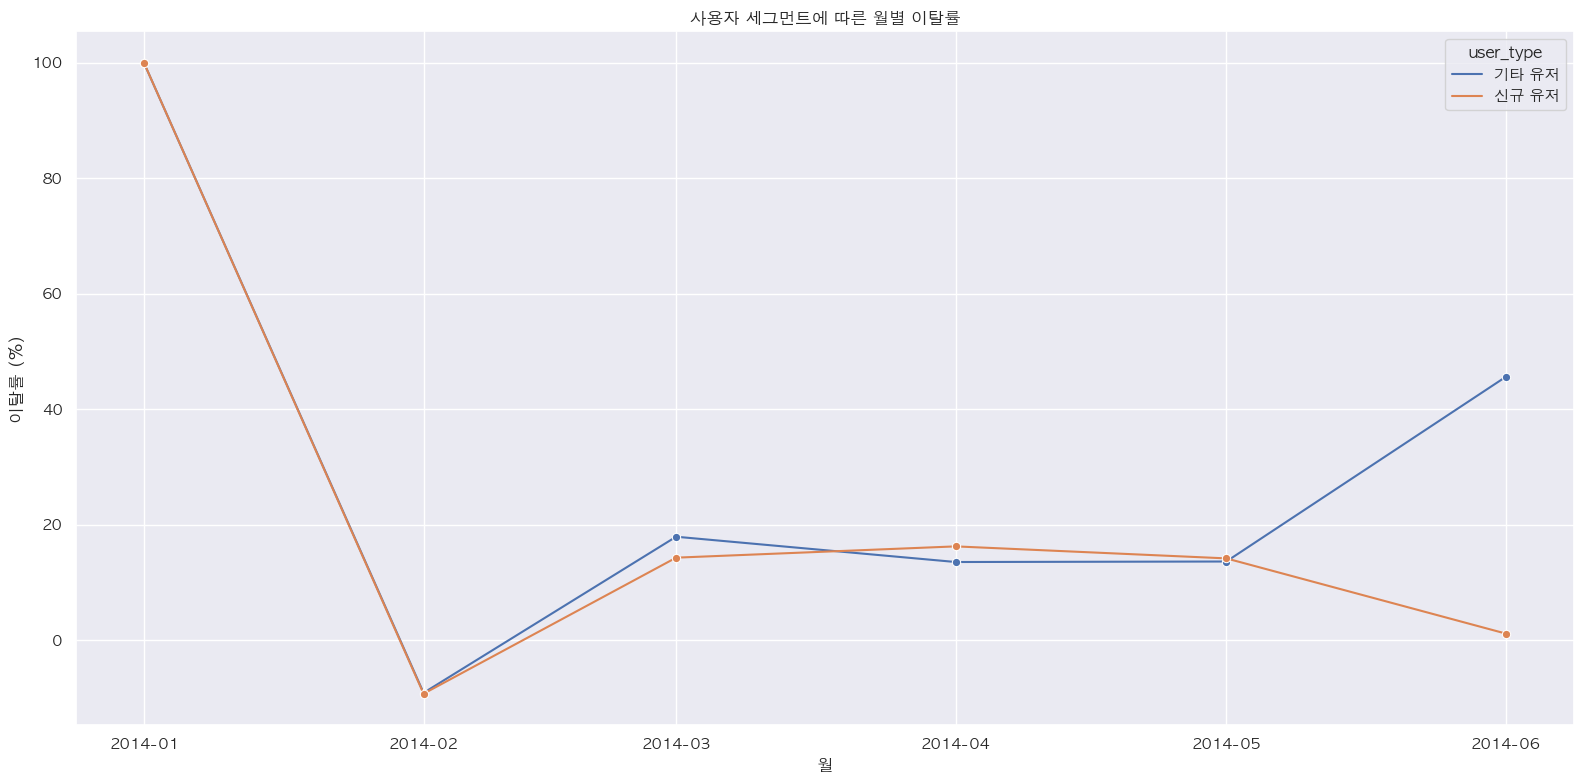

In [34]:
## 사용자 세그먼트에 따른 월별 이탈률 계산 및 시각화

# 이탈률 계산 함수
def calculate_churn_rate(df, group_by):
    # 월별 활성 사용자 계산
    monthly_active_users = df.groupby(['user_id', 'month', group_by]).size().reset_index(name='counts')

    # 현재 월의 활성 사용자 계산
    current_month_users = monthly_active_users.groupby(['month', group_by]).agg({'user_id': 'count'}).reset_index()

    # 다음 월의 활성 사용자 계산
    next_month_users = monthly_active_users.copy()
    next_month_users['month'] = (next_month_users['month'].dt.to_timestamp() + pd.offsets.MonthBegin(1)).dt.to_period('M')
    next_month_users = next_month_users.groupby(['month', group_by]).agg({'user_id': 'count'}).reset_index()

    # 현재 월과 다음 월 데이터 병합
    churn_df = current_month_users.merge(next_month_users, on=['month', group_by], suffixes=('_current', '_next'), how='left').fillna(0)

    # 이탈률 계산
    churn_df['churn_rate'] = (churn_df['user_id_current'] - churn_df['user_id_next']) / churn_df['user_id_current'] * 100
    churn_df['month'] = churn_df['month'].dt.to_timestamp()  # month 컬럼 값을 타임 스탬프로 변환

    return churn_df

# 사용자 세그먼트별 이탈률 계산
churn_by_user_type = calculate_churn_rate(user_visit, 'user_type')

# 시각화 함수
def plot_churn_rate(churn_df, group_by, title):
    plt.figure(figsize=(16, 8))
    sns.lineplot(data=churn_df, x='month', y='churn_rate', hue=group_by, marker='o')
    plt.title(title)
    plt.xlabel('월')
    plt.ylabel('이탈률 (%)')
    plt.legend(title=group_by)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 사용자 세그먼트별 이탈률 시각화
plot_churn_rate(churn_by_user_type, 'user_type', '사용자 세그먼트에 따른 월별 이탈률')

#### 사용자 세그먼트에 따른 월별 이탈률

(1월은 데이터 수집 시작 시점이기 때문에 모든 사용자가 이탈한 것 처럼 보이므로 2월부터 해석)
- 2014년 2월: 신규 유저와 기타 유저 모두 이탈률이 급격히 감소하여 약 음수의 값을 띄었다. 데이터 수집 시작시점과 가까워, 사용자가 처음 서비스를 이용하기 시작하면서 이탈률이 낮아진 것으로 추측된다.
- 2014년 3월: 신규 유저의 이탈률이 약 20%로 증가하고 기타 유저(=재방문한 사용자)의 이탈률도 비슷한 수준으로 증가한다. 이는 사용자들이 한 달 정도 서비스를 이용한 후 일부가 이탈하기 시작한 시점으로 보인다.
- 2014년 4월 ~ 5월: 신규 유저와 기타 유저 모두 이탈률이 안정세를 보인다. 4~5월 이탈률은 20% 내외로 유지된다.
- 2014년 6월: 기타 유저의 이탈률이 급격히 상승하여 40%를 넘기고, 반면 신규 유저의 이탈률은 약간 감소하여 20% 이하로 떨어졌다. 기존 사용자들의 이탈이 증가한 반면, 신규 유저의 유지율이 상대적으로 높아졌다.

전반적인 이탈률 동향 : 신규 유저의 이탈률은 초기에는 급격히 감소했다가 이후 안정세를 보였으며, 기타 유저(재방문한 사용자)의 이탈률은 시간이 지남에 따라 점진적으로 증가하는 경향을 보였다.

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1458/1424721932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_users_df['month'] = new_users_df['session_timestamp'].dt.to_period('M')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


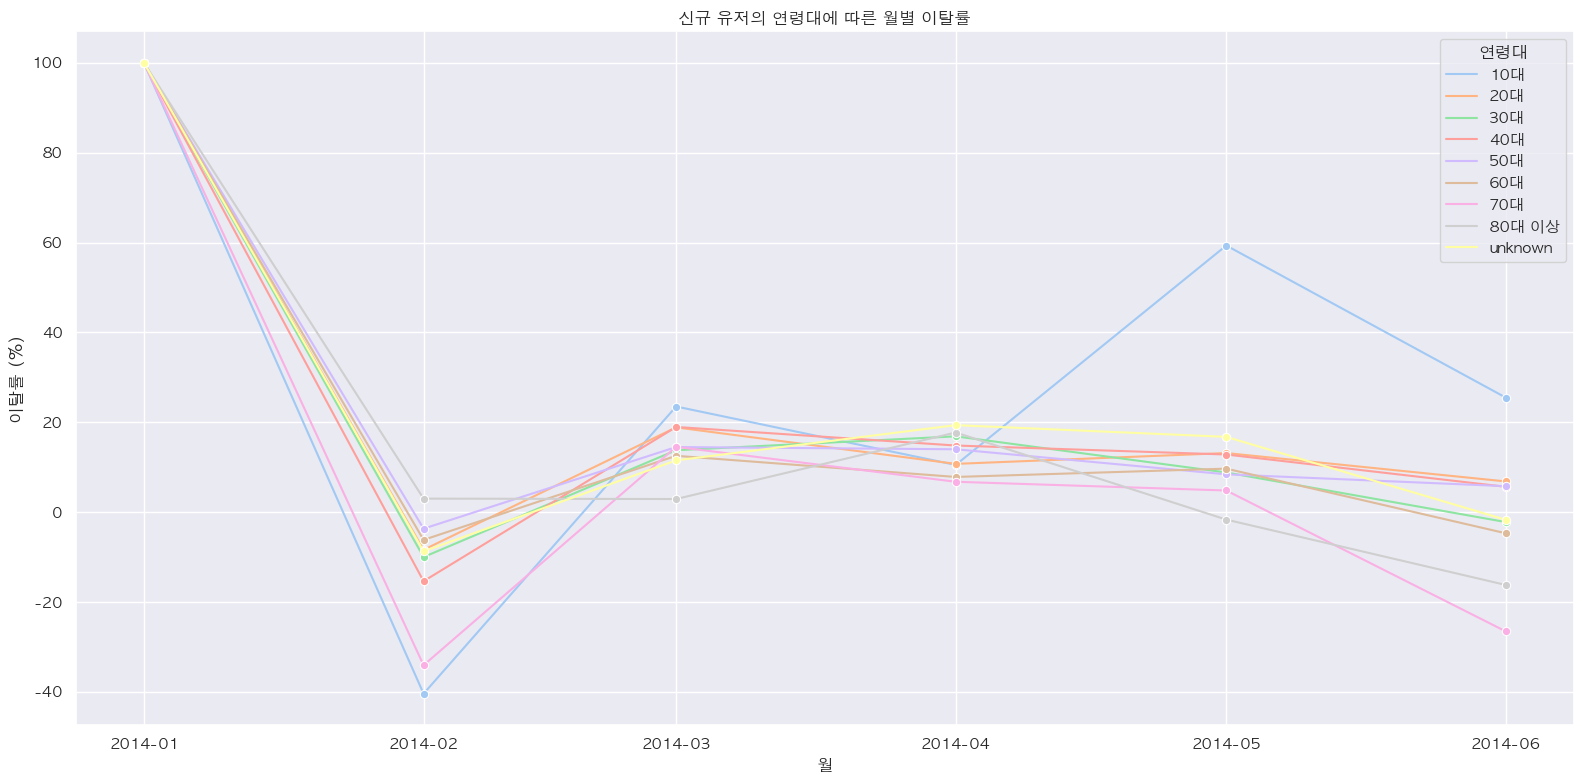

In [66]:
## 신규 유저에 대해서 연령대에 따른 월별 이탈률 변화 파악

# '신규 유저' 데이터 필터링
new_users_df = user_visit[user_visit['user_type'] == '신규 유저']

# 월별 활성 사용자 테이블 생성
new_users_df['month'] = new_users_df['session_timestamp'].dt.to_period('M')

# 각 월별 활성 사용자 테이블 생성
monthly_active_users = new_users_df.groupby(['month', 'age_group', 'user_id']).size().reset_index(name='counts')

# 현재 월의 활성 사용자 계산
current_month_users = monthly_active_users.groupby(['month', 'age_group']).agg({'user_id': 'nunique'}).reset_index()

# 다음 월의 활성 사용자 계산
next_month_users = monthly_active_users.copy()
next_month_users['month'] = next_month_users['month'] + 1
next_month_users = next_month_users.groupby(['month', 'age_group']).agg({'user_id': 'nunique'}).reset_index()

# 현재 월과 다음 월 데이터 병합
churn_df = current_month_users.merge(next_month_users, on=['month', 'age_group'], suffixes=('_current', '_next'), how='left').fillna(0)

# 이탈률 계산 = (현재 월의 사용자 수 - 다음 월의 사용자 수) / 현재 월의 사용자 수 * 100
churn_df['churn_rate'] = (churn_df['user_id_current'] - churn_df['user_id_next']) / churn_df['user_id_current'] * 100

# month를 datetime으로 변환
churn_df['month'] = churn_df['month'].dt.to_timestamp()

# churn_rate를 숫자로 변환
churn_df['churn_rate'] = pd.to_numeric(churn_df['churn_rate'])

# 시각화
plt.figure(figsize=(16, 8))
sns.lineplot(data=churn_df, x='month', y='churn_rate', hue='age_group', marker='o')
plt.title('신규 유저의 연령대에 따른 월별 이탈률')
plt.xlabel('월')
plt.ylabel('이탈률 (%)')
plt.legend(title='연령대')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/y3/1b293z7j6fn066ztwnt72ybw0000gn/T/ipykernel_1458/3799268040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_users_df['month'] = other_users_df['session_timestamp'].dt.to_period('M')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


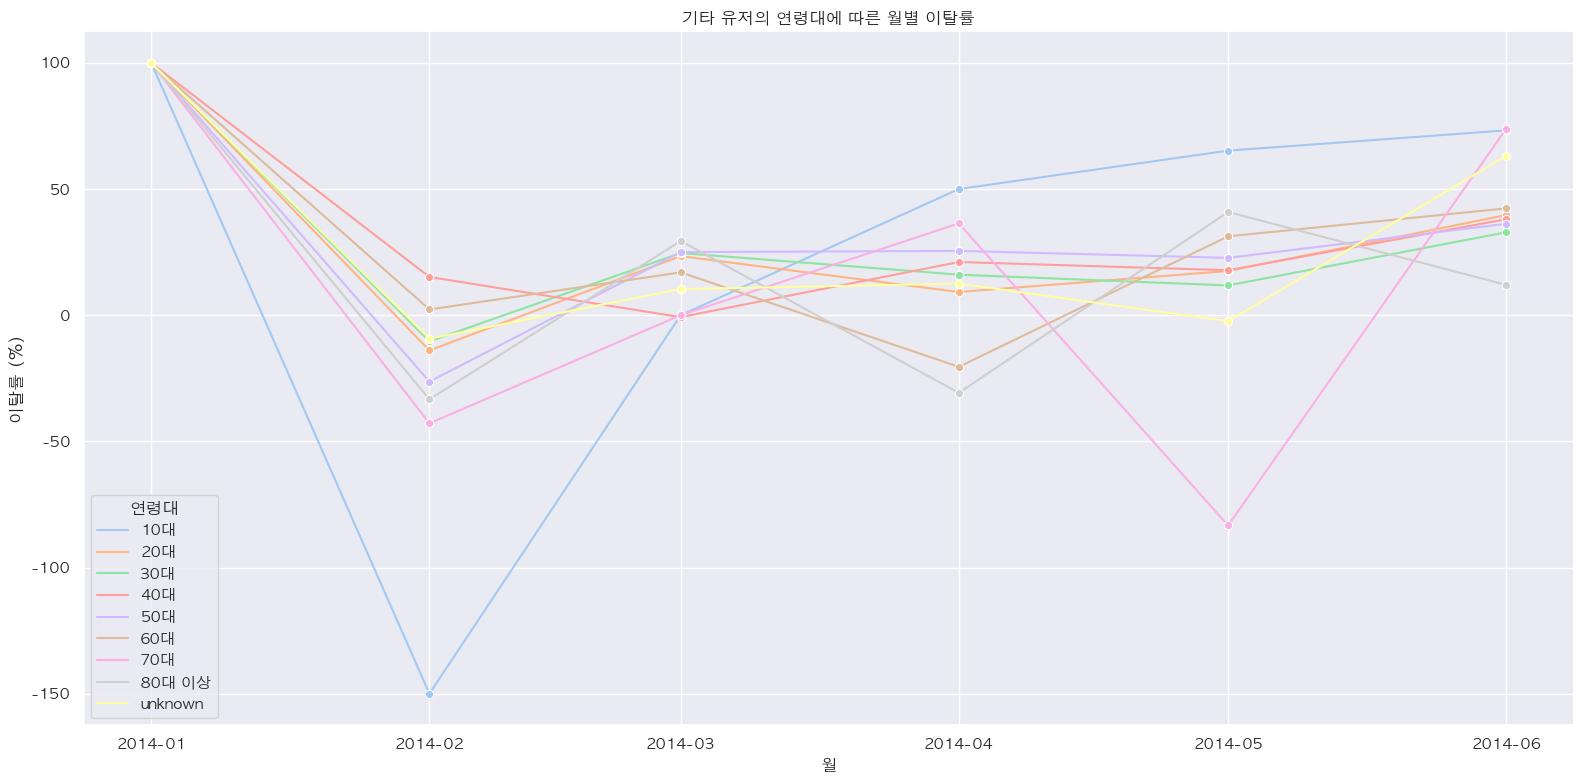

In [67]:
## 기타 유저에 대해서 연령대에 따른 월별 이탈률 변화 파악

# '기타 유저' 데이터 필터링
other_users_df = user_visit[user_visit['user_type'] == '기타 유저']

# 월별 활성 사용자 테이블 생성
other_users_df['month'] = other_users_df['session_timestamp'].dt.to_period('M')

# 각 월별 활성 사용자 테이블 생성
monthly_active_users = other_users_df.groupby(['month', 'age_group', 'user_id']).size().reset_index(name='counts')

# 현재 월의 활성 사용자 계산
current_month_users = monthly_active_users.groupby(['month', 'age_group']).agg({'user_id': 'nunique'}).reset_index()

# 다음 월의 활성 사용자 계산
next_month_users = monthly_active_users.copy()
next_month_users['month'] = next_month_users['month'] + 1
next_month_users = next_month_users.groupby(['month', 'age_group']).agg({'user_id': 'nunique'}).reset_index()

# 현재 월과 다음 월 데이터 병합
churn_df = current_month_users.merge(next_month_users, on=['month', 'age_group'], suffixes=('_current', '_next'), how='left').fillna(0)

# 이탈률 계산 = (현재 월의 사용자 수 - 다음 월의 사용자 수) / 현재 월의 사용자 수 * 100
churn_df['churn_rate'] = (churn_df['user_id_current'] - churn_df['user_id_next']) / churn_df['user_id_current'] * 100

# month를 datetime으로 변환
churn_df['month'] = churn_df['month'].dt.to_timestamp()

# churn_rate를 숫자로 변환
churn_df['churn_rate'] = pd.to_numeric(churn_df['churn_rate'])

# 시각화
plt.figure(figsize=(16, 8))
sns.lineplot(data=churn_df, x='month', y='churn_rate', hue='age_group', marker='o')
plt.title('기타 유저의 연령대에 따른 월별 이탈률')
plt.xlabel('월')
plt.ylabel('이탈률 (%)')
plt.legend(title='연령대')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 기타 유저의 연령대에 따른 월별 이탈률 추이

- 10대 사용자: 2014년 2월에 이탈률이 -150% 이상으로 큰 폭으로 감소하였으며, 이후 지속적으로 이탈률이 증가하는 경향을 보인다.
- 40대 사용자: 2014년 5월에 이탈률이 -50% 이하로 감소하였으나, 6월에 다시 증가하는 경향을 보인다.
- 30대, 50대, 60대 사용자: 비교적 안정적인 패턴을 보이며, 큰 변동 없이 유지된다.
- 80대 이상 사용자: 2014년 3월과 6월에 이탈률이 큰 폭으로 증가하는 경향을 보인다.
- unknown : 초기에는 높은 이탈률을 보이다가 이후 안정화 되었다.

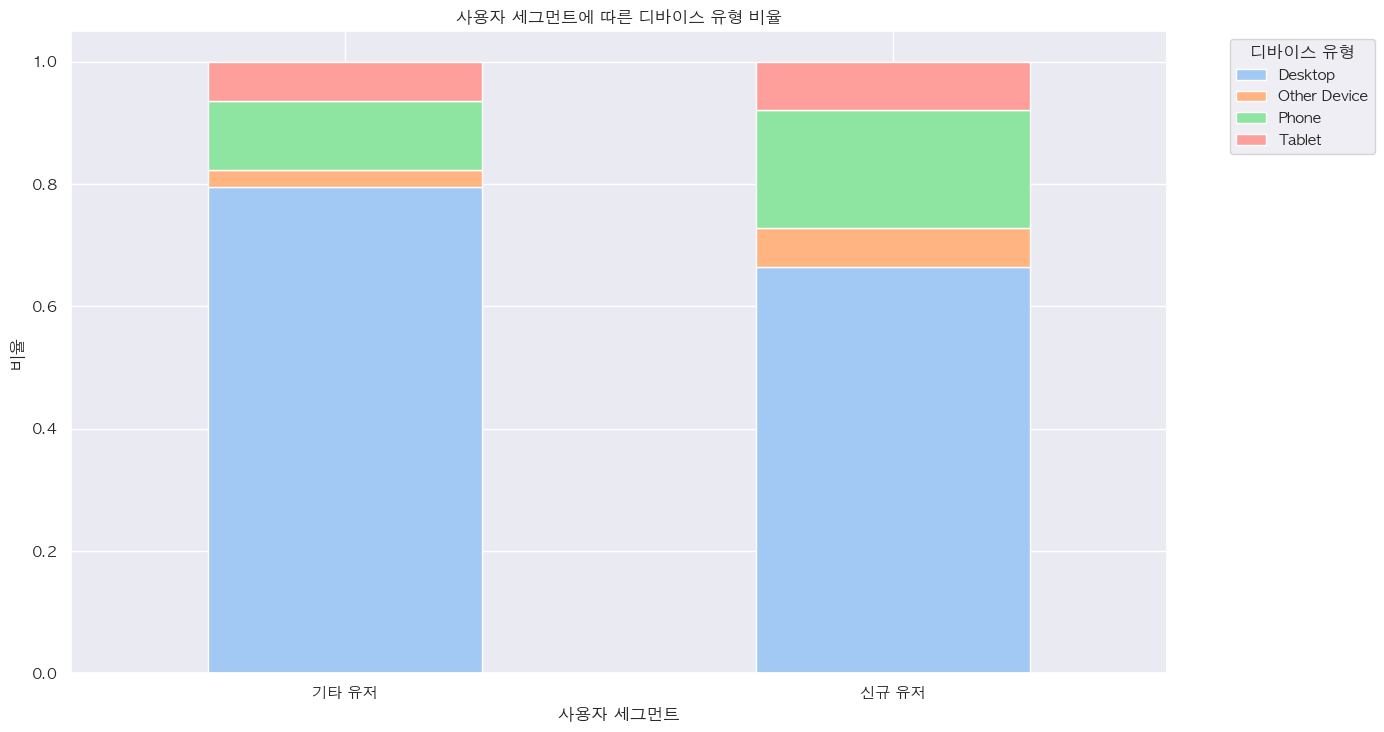

In [43]:
# 사용자 세그먼트 별 디바이스 유형 분석
def analyze_device_type(df):
    device_count = df.groupby(['user_type', 'device_category']).size().unstack(fill_value=0)
    device_count_norm = device_count.div(device_count.sum(axis=1), axis=0)  # 각 사용자 유형 내 비율 계산

    pastel_colors = sns.color_palette("pastel")
    device_count_norm.plot(kind='bar', stacked=True, figsize=(14, 8), color=pastel_colors)
    plt.title('사용자 세그먼트에 따른 디바이스 유형 비율')
    plt.xlabel('사용자 세그먼트')
    plt.ylabel('비율')
    plt.legend(title='디바이스 유형', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.xticks(rotation=0)
    plt.show()

analyze_device_type(user_visit)

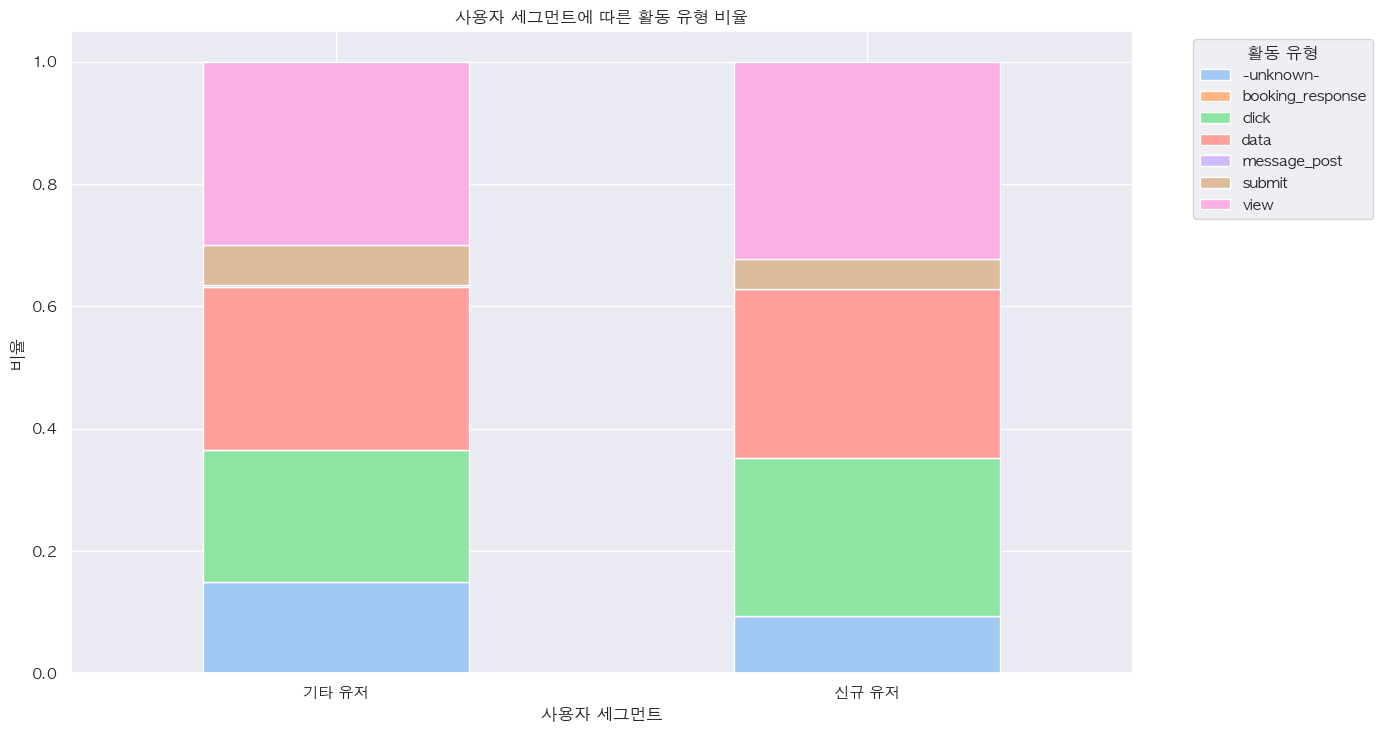

In [45]:
# 활동 유형 분석
def analyze_action_type(df):
    action_count = df.groupby(['user_type', 'action_type']).size().unstack(fill_value=0)
    action_count_norm = action_count.div(action_count.sum(axis=1), axis=0)  # 각 사용자 유형 내 비율 계산

    pastel_colors = sns.color_palette("pastel")
    action_count_norm.plot(kind='bar', stacked=True, figsize=(14, 8), color=pastel_colors)
    plt.title('사용자 세그먼트에 따른 활동 유형 비율')
    plt.xlabel('사용자 세그먼트')
    plt.ylabel('비율')
    plt.legend(title='활동 유형', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.xticks(rotation=0)
    plt.show()

analyze_action_type(user_visit)

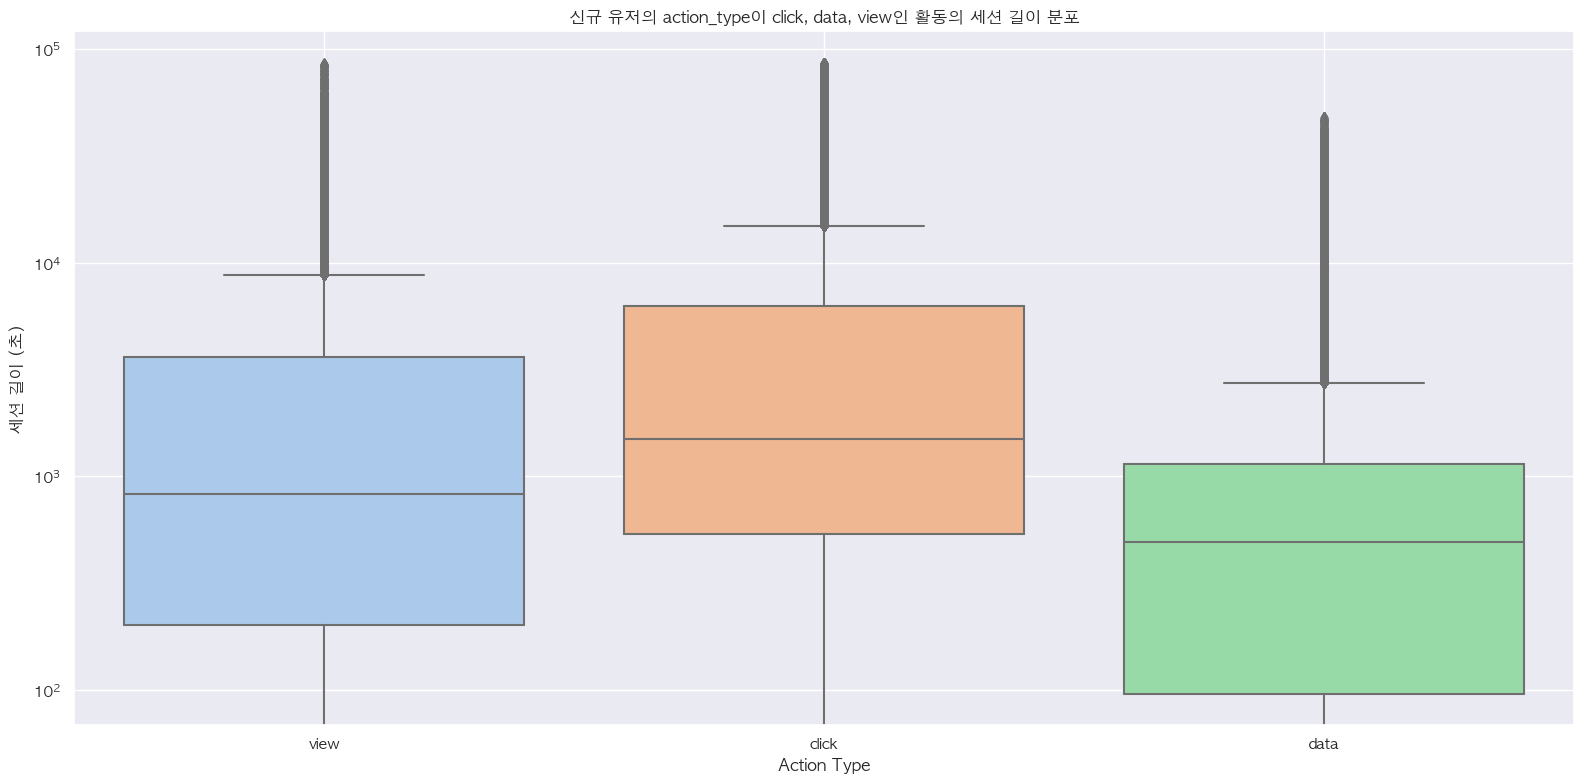

In [54]:
# '신규 유저' 데이터 필터링
new_users_df = user_visit[user_visit['user_type'] == '신규 유저']

# 'click', 'data', 'view' action_type 필터링
filtered_actions = new_users_df[new_users_df['action_type'].isin(['click', 'data', 'view'])]

# 시각화
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_actions, x='action_type', y='secs_elapsed', palette='pastel')
plt.title('신규 유저의 action_type이 click, data, view인 활동의 세션 길이 분포')
plt.xlabel('Action Type')
plt.ylabel('세션 길이 (초)')
plt.yscale('log')  # 세션 길이의 넓은 분포를 보기 위해 로그 스케일 사용
plt.grid(True)
plt.tight_layout()
plt.show()

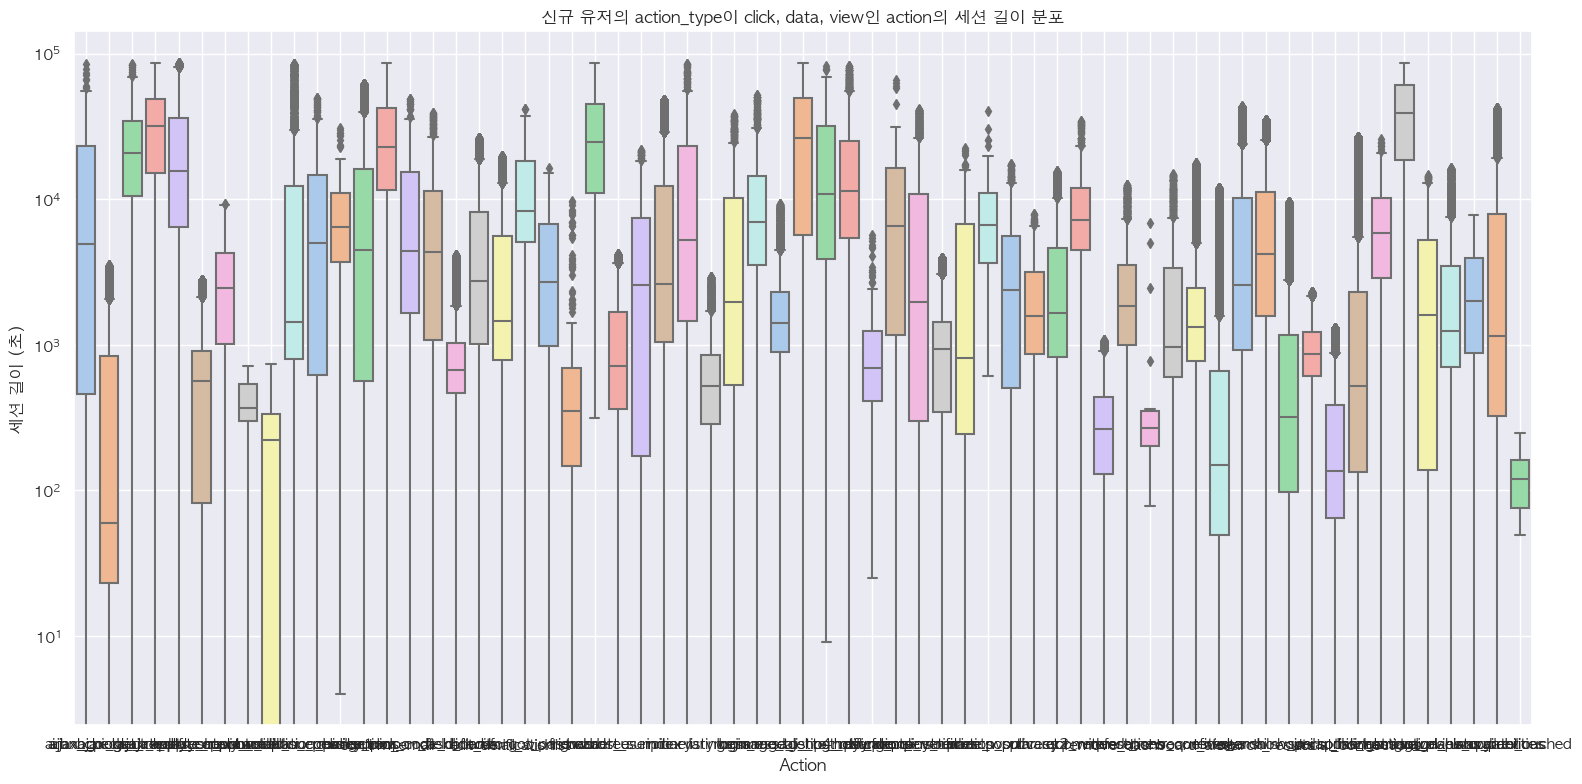

In [56]:
# '신규 유저' 데이터 필터링
new_users_df = user_visit[user_visit['user_type'] == '신규 유저']

# 'click', 'data', 'view' action_type 필터링
filtered_actions = new_users_df[new_users_df['action_type'].isin(['click', 'data', 'view'])]

# 시각화
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_actions, x='action', y='secs_elapsed', palette='pastel')
plt.title('신규 유저의 action_type이 click, data, view인 action의 세션 길이 분포')
plt.xlabel('Action')
plt.ylabel('세션 길이 (초)')
plt.yscale('log')  # 세션 길이의 넓은 분포를 보기 위해 로그 스케일 사용
plt.grid(True)
plt.tight_layout()
plt.show()

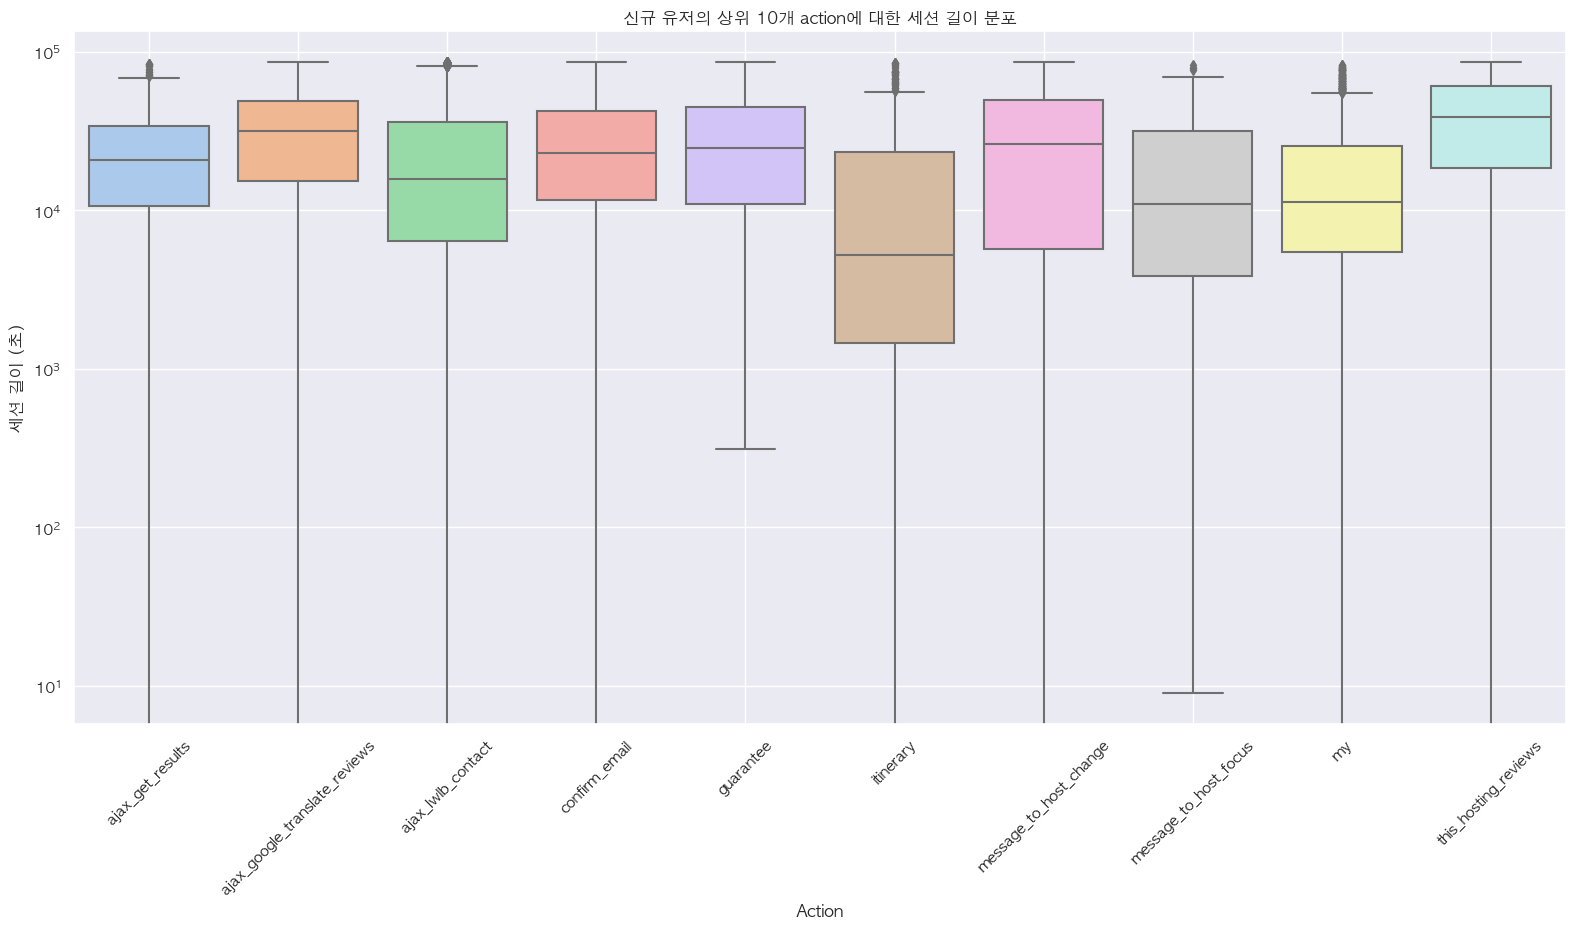

In [58]:
# '신규 유저' 데이터 필터링
new_users_df = user_visit[user_visit['user_type'] == '신규 유저']

# 'click', 'data', 'view' action_type 필터링
filtered_actions = new_users_df[new_users_df['action_type'].isin(['click', 'data', 'view'])]

# 세션 길이의 평균값 기준 상위 10개의 action 선택
top_actions = filtered_actions.groupby('action')['secs_elapsed'].mean().nlargest(10).index

# 상위 10개 action에 해당하는 데이터 필터링
top_actions_df = filtered_actions[filtered_actions['action'].isin(top_actions)]

# 시각화
plt.figure(figsize=(16, 8))
sns.boxplot(data=top_actions_df, x='action', y='secs_elapsed', palette='pastel')
plt.title('신규 유저의 상위 10개 action에 대한 세션 길이 분포')
plt.xlabel('Action')
plt.ylabel('세션 길이 (초)')
plt.yscale('log')  # 세션 길이의 넓은 분포를 보기 위해 로그 스케일 사용
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### 신규 유저의 상위 10개 action

- `ajax_get_results` : 세션 길이가 비교적 균일하게 분포되어 있으며, 중앙값은 약 10,000초(약 2.78시간)이다.
- `ajax_google_translate_reviews` : 중앙값이 약 10,000초로 ajax_get_results와 유사한 분포를 보인다.
- `ajax_lwlb_contact` : 중앙값은 약 10,000초이며, 다른 액션들에 비해 이상치가 더 적은 편입니다.
- `confirm_email` : 중앙값이 다른 액션들보다 낮으며, 약 3,000초(약 50분)입니다.
- `gaurantee` : 중앙값이 약 10,000초로 나타나며, 상위 사분위수 범위가 다른 액션들에 비해 넓습니다.
- `itinerary` : 중앙값은 약 10,000초로 비슷하며, 분포가 상대적으로 넓게 퍼져 있습니다.
- `message_to_host_change` : 중앙값이 약 10,000초이며, 다른 액션들에 비해 상위 사분위수가 더 높습니다.
- `message_to_host_focus` : 중앙값이 약 2,000초로, 다른 액션들에 비해 낮습니다.
- `my` : 중앙값이 약 10,000초로 비슷한 분포를 보입니다.
- `this_hosting_reviews` : 중앙값이 약 10,000초로 나타나며, 분포가 상대적으로 균일하게 퍼져 있습니다.

- 대부분의 액션에서 세션 길이에 대한 몇몇 이상치(outliers)가 존재했다. 이는 특정 사용자가 해당 액션을 수행하는 데에 비정상적으로 긴 시간을 소요했음을 의미한다.
- 특히 `ajax_get_results`와 `ajax_google_translate_reviews`, `itinerary`에서는 상위 사분위수보다 훨씬 큰 값이 관찰됐다.
- `confirm_email`과 `message_to_host_focus`는 다른 액션들에 비해 중앙값이 낮고, 상위 사분위수도 낮다. 이 두 액션이 상대적으로 짧은 시간 내에 완료되는 경향이 있음을 나타낸다.
- `message_to_host_change`는 상위 사분위수가 다른 액션들보다 높아, 일부 사용자가 해당 액션을 수행하는 데에 더 긴 시간을 소요했음을 알 수 있습니다.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


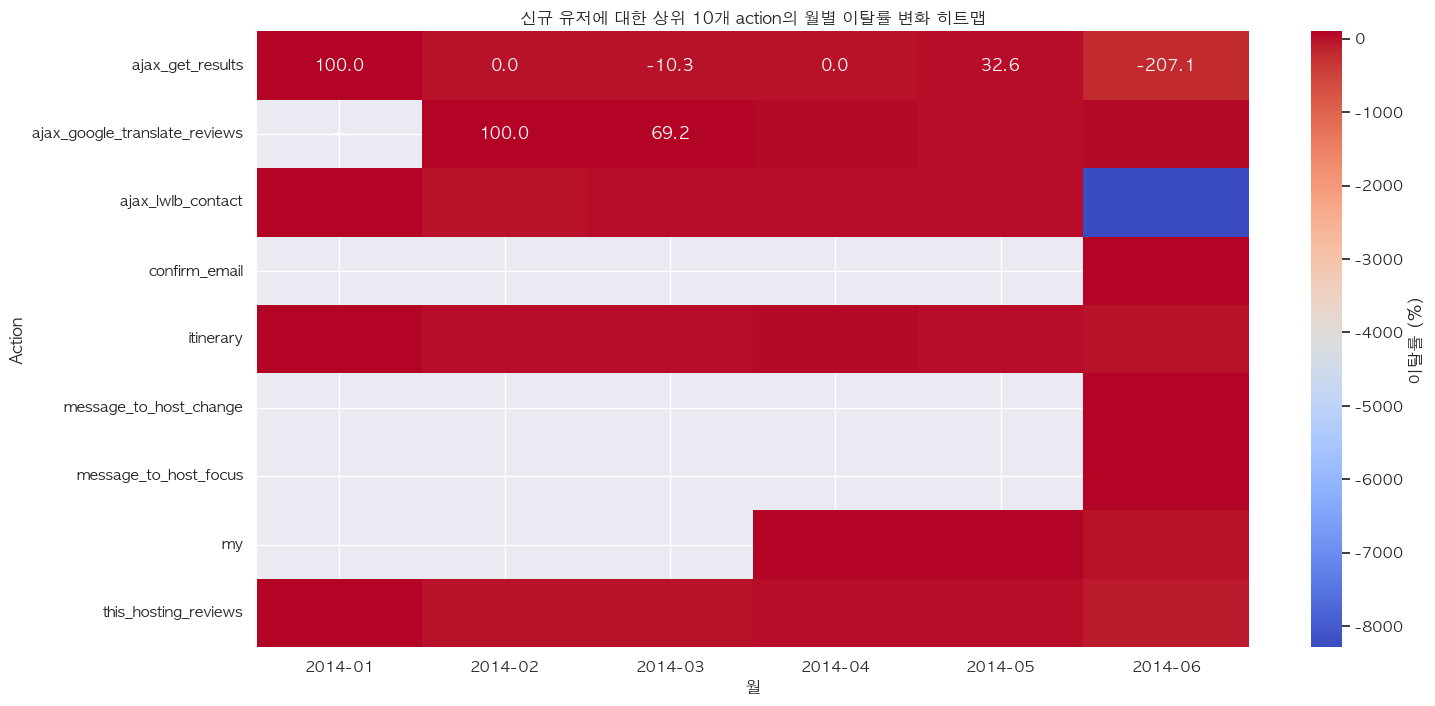

In [63]:
## 신규 유저에 대한 상위 10개 action의 월별 이탈률 히트맵

# 상위 10개 action 리스트
top_actions = ['ajax_get_results', 'ajax_google_translate_reviews', 'ajax_lwlb_contact',
               'confirm_email', 'gaurantee', 'itinerary', 'message_to_host_change',
               'message_to_host_focus', 'my', 'this_hosting_reviews']

# 상위 10개 action에 해당하는 데이터 필터링
top_actions_df = new_users_df[new_users_df['action'].isin(top_actions)]

# 월별 활성 사용자 테이블 생성
top_actions_df.loc[:, 'month'] = top_actions_df['session_timestamp'].dt.to_period('M')

# 각 월별 활성 사용자 테이블 생성
monthly_active_users = top_actions_df.groupby(['month', 'action', 'user_id']).size().reset_index(name='counts')

# 현재 월의 활성 사용자 계산
current_month_users = monthly_active_users.groupby(['month', 'action']).agg({'user_id': 'nunique'}).reset_index()

# 다음 월의 활성 사용자 계산
next_month_users = monthly_active_users.copy()
next_month_users['month'] = next_month_users['month'] + 1
next_month_users = next_month_users.groupby(['month', 'action']).agg({'user_id': 'nunique'}).reset_index()

# 현재 월과 다음 월 데이터 병합
churn_df = current_month_users.merge(next_month_users, on=['month', 'action'], suffixes=('_current', '_next'), how='left').fillna(0)

# 이탈률 계산 = (현재 월의 사용자 수 - 다음 월의 사용자 수) / 현재 월의 사용자 수 * 100
churn_df['churn_rate'] = (churn_df['user_id_current'] - churn_df['user_id_next']) / churn_df['user_id_current'] * 100

# 히트맵을 위한 데이터 변환
churn_pivot = churn_df.pivot(index='action', columns='month', values='churn_rate')

# 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(churn_pivot, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': '이탈률 (%)'})
plt.title('신규 유저에 대한 상위 10개 action의 월별 이탈률 변화 히트맵')
plt.xlabel('월')
plt.ylabel('Action')
plt.show()

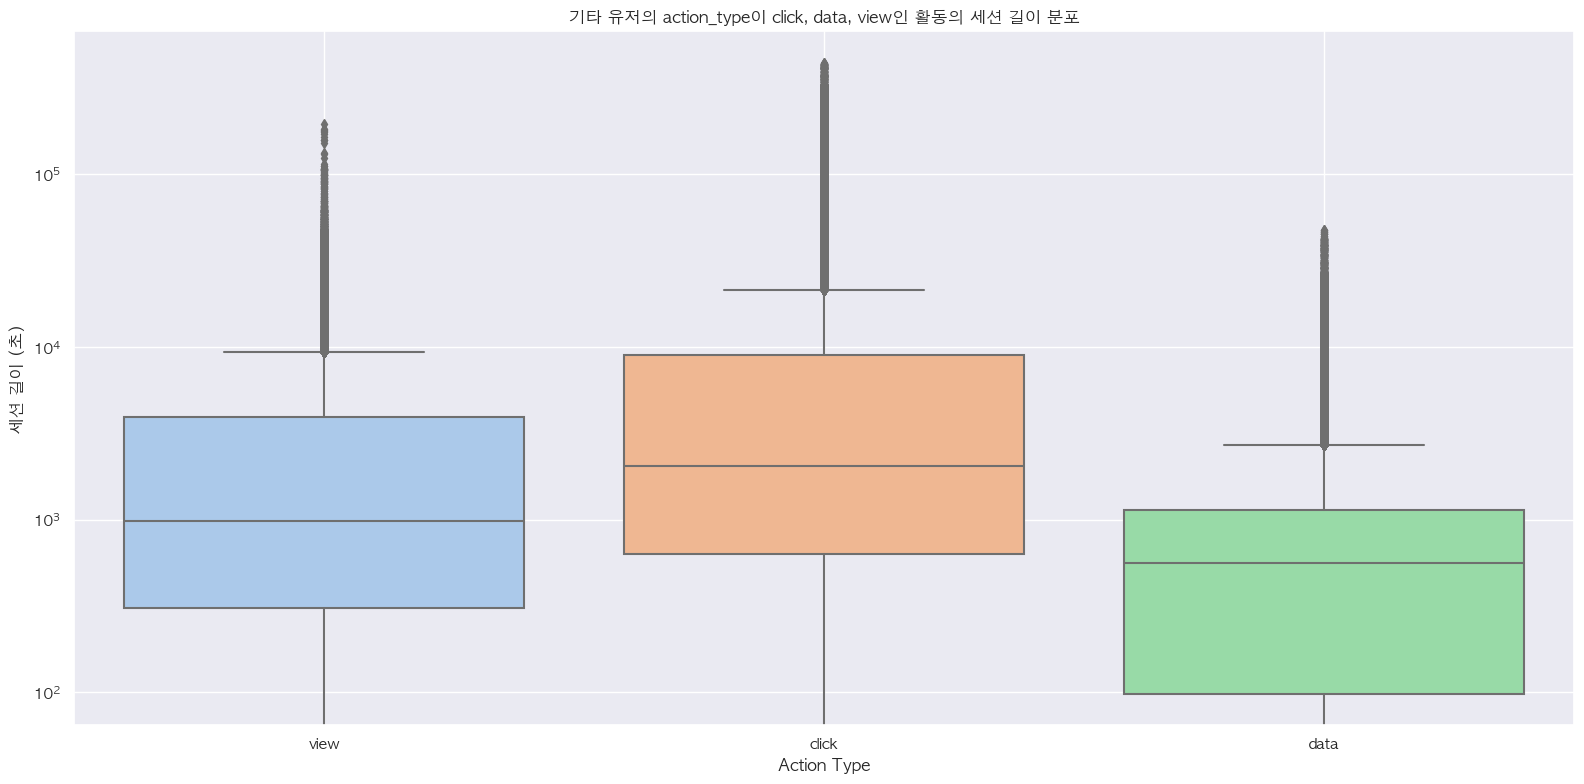

In [55]:
# '기타 유저' 데이터 필터링
other_users_df = user_visit[user_visit['user_type'] == '기타 유저']

# 'click', 'data', 'view' action_type 필터링
filtered_actions = other_users_df[other_users_df['action_type'].isin(['click', 'data', 'view'])]

# 시각화
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_actions, x='action_type', y='secs_elapsed', palette='pastel')
plt.title('기타 유저의 action_type이 click, data, view인 활동의 세션 길이 분포')
plt.xlabel('Action Type')
plt.ylabel('세션 길이 (초)')
plt.yscale('log')  # 세션 길이의 넓은 분포를 보기 위해 로그 스케일 사용
plt.grid(True)
plt.tight_layout()
plt.show()

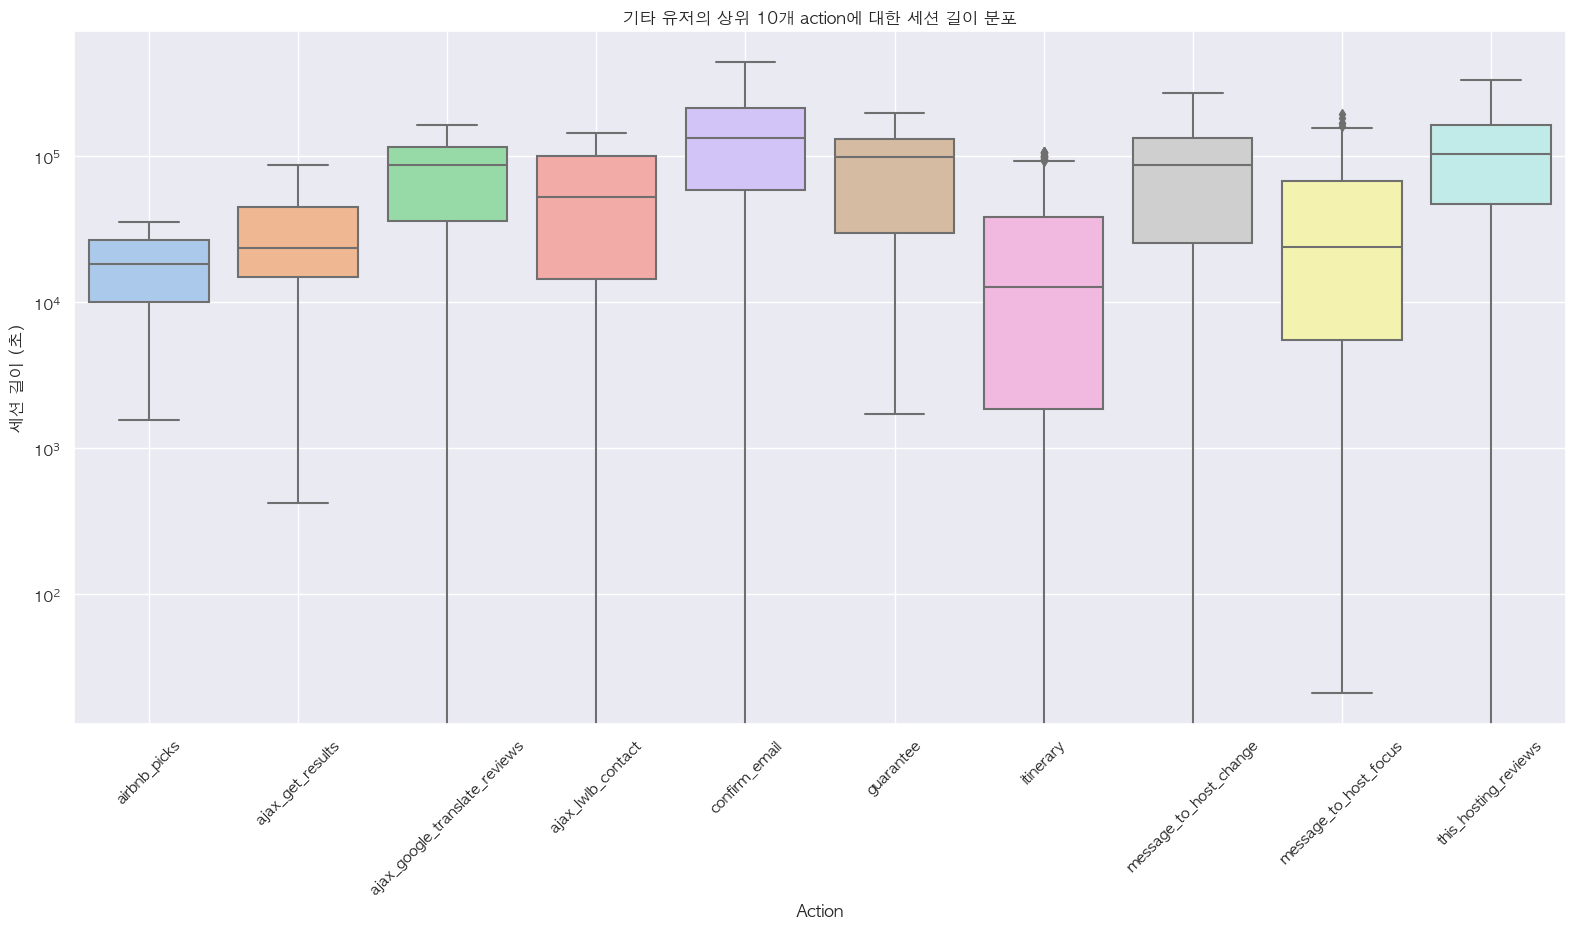

In [59]:
## 기타 유저들의 세션 길이 평균값 기준 상위 10개의 action 파악 (action_type이 click, data, view인 action)

# 'click', 'data', 'view' action_type 필터링
filtered_actions = other_users_df[other_users_df['action_type'].isin(['click', 'data', 'view'])]

# 세션 길이의 평균값 기준 상위 10개의 action 선택
top_actions = filtered_actions.groupby('action')['secs_elapsed'].mean().nlargest(10).index

# 상위 10개 action에 해당하는 데이터 필터링
top_actions_df = filtered_actions[filtered_actions['action'].isin(top_actions)]

# 시각화
plt.figure(figsize=(16, 8))
sns.boxplot(data=top_actions_df, x='action', y='secs_elapsed', palette='pastel')
plt.title('기타 유저의 상위 10개 action에 대한 세션 길이 분포')
plt.xlabel('Action')
plt.ylabel('세션 길이 (초)')
plt.yscale('log')  # 세션 길이의 넓은 분포를 보기 위해 로그 스케일 사용
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

- `airbnb_picks`
- `ajax_get_results`
- `ajax_google_translate_reviews`
- `ajax_lwlb_contact`
- `confirm_email`
- `gaurantee`
- `itinerary`
- `message_to_host_change`
- `message_to_host_focus`
- `this_hosting_reviews`

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


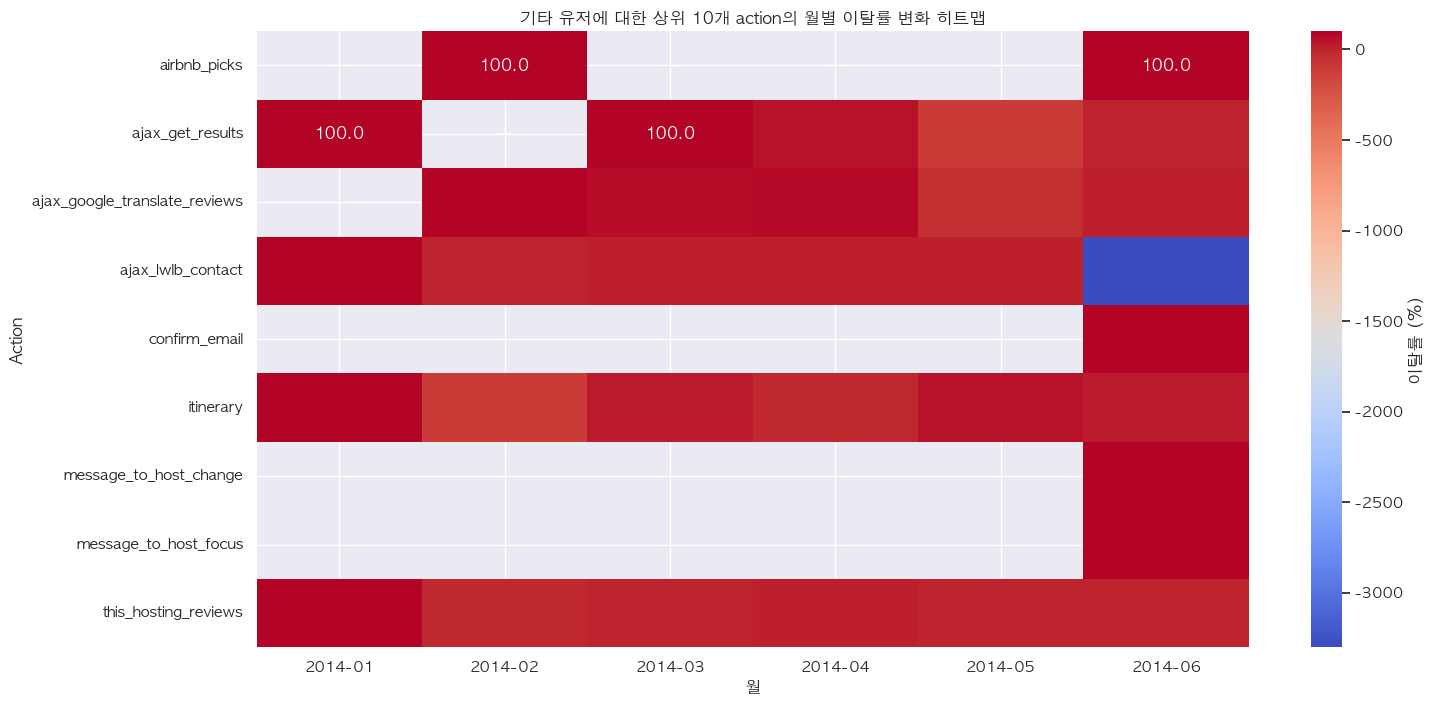

In [64]:
## 기타 유저에 대한 상위 10개 action의 월별 이탈률 히트맵

# 상위 10개 action 리스트
top_actions = ['airbnb_picks', 'ajax_get_results', 'ajax_google_translate_reviews', 'ajax_lwlb_contact',
               'confirm_email', 'gaurantee', 'itinerary', 'message_to_host_change',
               'message_to_host_focus', 'this_hosting_reviews']

# 상위 10개 action에 해당하는 데이터 필터링
top_actions_df = other_users_df[other_users_df['action'].isin(top_actions)]

# 월별 활성 사용자 테이블 생성
top_actions_df.loc[:, 'month'] = top_actions_df['session_timestamp'].dt.to_period('M')

# 각 월별 활성 사용자 테이블 생성
monthly_active_users = top_actions_df.groupby(['month', 'action', 'user_id']).size().reset_index(name='counts')

# 현재 월의 활성 사용자 계산
current_month_users = monthly_active_users.groupby(['month', 'action']).agg({'user_id': 'nunique'}).reset_index()

# 다음 월의 활성 사용자 계산
next_month_users = monthly_active_users.copy()
next_month_users['month'] = next_month_users['month'] + 1
next_month_users = next_month_users.groupby(['month', 'action']).agg({'user_id': 'nunique'}).reset_index()

# 현재 월과 다음 월 데이터 병합
churn_df = current_month_users.merge(next_month_users, on=['month', 'action'], suffixes=('_current', '_next'), how='left').fillna(0)

# 이탈률 계산 = (현재 월의 사용자 수 - 다음 월의 사용자 수) / 현재 월의 사용자 수 * 100
churn_df['churn_rate'] = (churn_df['user_id_current'] - churn_df['user_id_next']) / churn_df['user_id_current'] * 100

# 히트맵을 위한 데이터 변환
churn_pivot = churn_df.pivot(index='action', columns='month', values='churn_rate')

# 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(churn_pivot, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': '이탈률 (%)'})
plt.title('기타 유저에 대한 상위 10개 action의 월별 이탈률 변화 히트맵')
plt.xlabel('월')
plt.ylabel('Action')
plt.show()

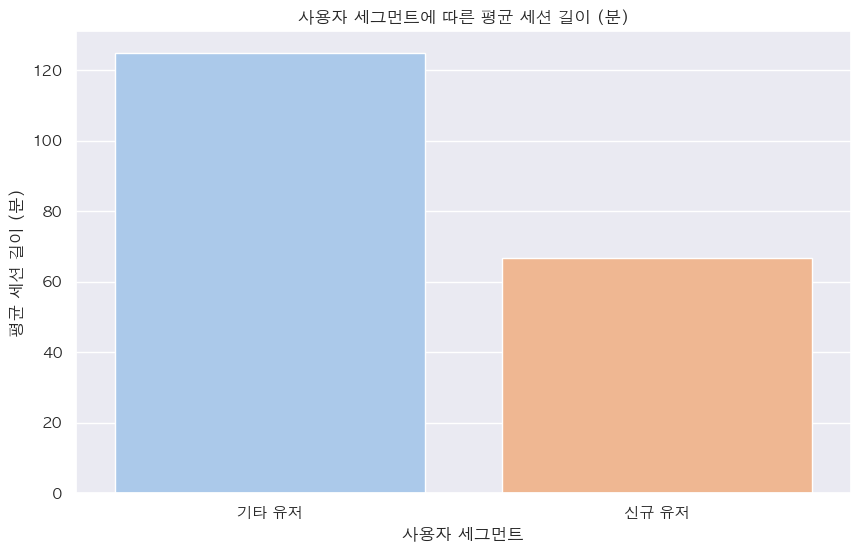

In [47]:
## 사용자 세그먼트에 따른 세션 길이(세션에 얼마나 머물러있었는가) 분석
def analyze_session_length(df):
    session_length = df.groupby('user_type')['secs_elapsed'].mean().reset_index()
    session_length['secs_elapsed'] = session_length['secs_elapsed'] / 60  # 초를 분으로 변환

    pastel_colors = sns.color_palette("pastel")
    plt.figure(figsize=(10, 6))
    sns.barplot(data=session_length, x='user_type', y='secs_elapsed', palette=pastel_colors)
    plt.title('사용자 세그먼트에 따른 평균 세션 길이 (분)')
    plt.xlabel('사용자 세그먼트')
    plt.ylabel('평균 세션 길이 (분)')
    plt.show()

analyze_session_length(user_visit)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


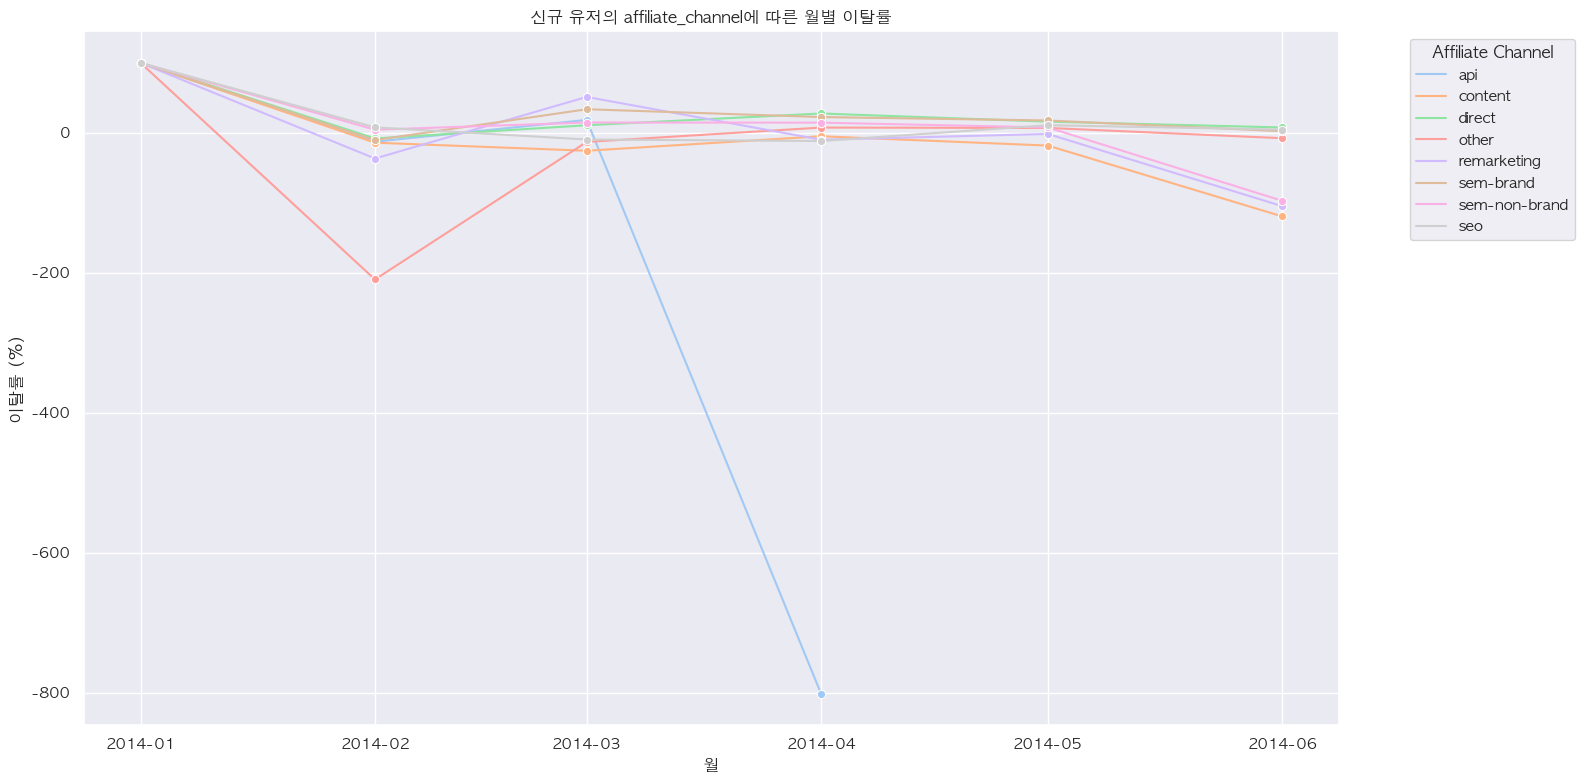

In [52]:
## 신규 유저에 대해서 affiliate_channel(사용자 유입 경로)에 따른 월별 이탈률

# 필요한 데이터 필터링 (신규 유저만)
new_users_df = user_visit[user_visit['user_type'] == '신규 유저']

# 이탈률 계산 함수
def calculate_churn_rate(df, group_by):
    # 월별 활성 사용자 계산
    monthly_active_users = df.groupby(['user_id', 'month', group_by]).size().reset_index(name='counts')

    # 현재 월의 활성 사용자 계산
    current_month_users = monthly_active_users.groupby(['month', group_by]).agg({'user_id': 'count'}).reset_index()

    # 다음 월의 활성 사용자 계산
    next_month_users = monthly_active_users.copy()
    next_month_users['month'] = (next_month_users['month'].dt.to_timestamp() + pd.offsets.MonthBegin(1)).dt.to_period('M')
    next_month_users = next_month_users.groupby(['month', group_by]).agg({'user_id': 'count'}).reset_index()

    # 현재 월과 다음 월 데이터 병합
    churn_df = current_month_users.merge(next_month_users, on=['month', group_by], suffixes=('_current', '_next'), how='left').fillna(0)

    # 이탈률 계산
    churn_df['churn_rate'] = (churn_df['user_id_current'] - churn_df['user_id_next']) / churn_df['user_id_current'] * 100
    churn_df['month'] = churn_df['month'].dt.to_timestamp()  # month 컬럼 값을 타임 스탬프로 변환

    return churn_df

# '신규 유저'의 affiliate_channel에 따른 월별 이탈률 계산
churn_by_affiliate_channel = calculate_churn_rate(new_users_df, 'affiliate_channel')

# 시각화
plt.figure(figsize=(16, 8))
sns.lineplot(data=churn_by_affiliate_channel, x='month', y='churn_rate', hue='affiliate_channel', marker='o')
plt.title('신규 유저의 affiliate_channel에 따른 월별 이탈률')
plt.xlabel('월')
plt.ylabel('이탈률 (%)')
plt.legend(title='Affiliate Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 신규 유저의 affiliate_channel에 따른 월별 이탈률
- 대부분의 채널에서 2014년 1월에 이탈률이 100%로 시작한다.
- 2014년 2월에는 대부분의 채널에서 이탈률이 급격히 감소하거나 음수로 전환되었다.
- 2014년 3월 이후, 이탈률은 안정화되며 대부분의 채널에서 비슷한 수준으로 유지된다.
- `direct` : 2014년 2월에 -200% 이상의 큰 음수 이탈률을 보인 후, 3월에 회복하여 안정화되는 추세이다.
- `api` : 2014년 3월 이후로 계속 음수 이탈률을 보이며, 특히 2014년 4월에 -800% 이상의 매우 낮은 이탈률을 보였다.
- `sem-non-brand` : 2014년 2월에 -200% 이상의 음수 이탈률을 보이며, 이후 안정화되었다.
- `remarketing`, `sem-brand`, `seo` : 대부분 안정적인 패턴을 보이며, 큰 변동이 없는 것으로 보인다.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


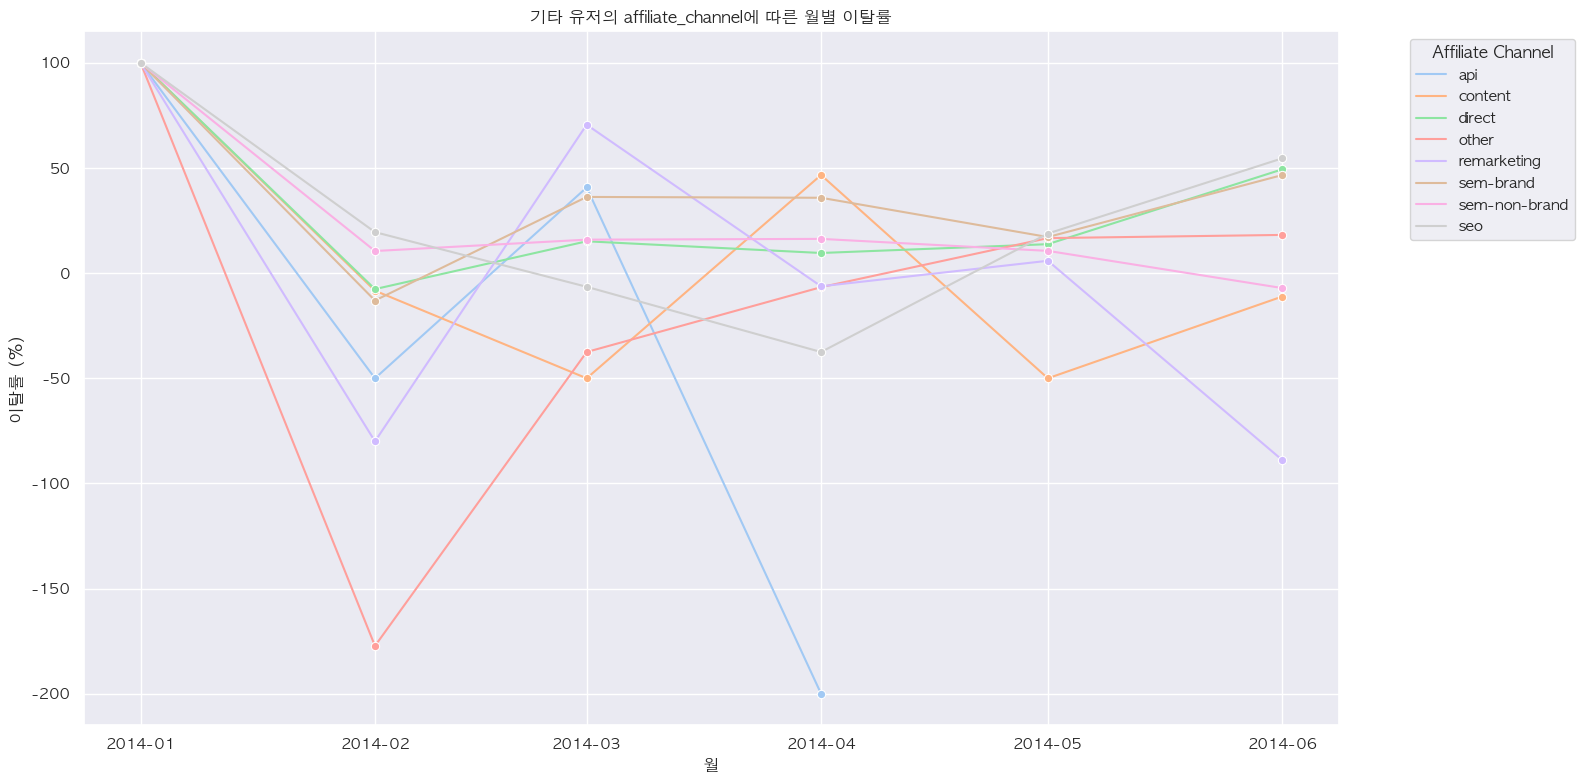

In [53]:
## 기타 유저에 대해서 affiliate_channel(사용자 유입 경로)에 따른 월별 이탈률

# 필요한 데이터 필터링 (기타 유저만)
new_users_df = user_visit[user_visit['user_type'] == '기타 유저']

# '신규 유저'의 affiliate_channel에 따른 월별 이탈률 계산
churn_by_affiliate_channel = calculate_churn_rate(new_users_df, 'affiliate_channel')

# 시각화
plt.figure(figsize=(16, 8))
sns.lineplot(data=churn_by_affiliate_channel, x='month', y='churn_rate', hue='affiliate_channel', marker='o')
plt.title('기타 유저의 affiliate_channel에 따른 월별 이탈률')
plt.xlabel('월')
plt.ylabel('이탈률 (%)')
plt.legend(title='Affiliate Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 기타 유저의 affiliate_channel에 따른 월별 이탈률

- 대부분의 채널에서 2014년 1월에 높은 이탈률을 보였다.
- 2014년 2월에는 이탈률이 급격히 감소했으며, 일부 채널에서는 음수값을 보이기 시작했다. 이후 몇몇 채널에서 이탈률의 변동이 크며, 특정 채널에서 음의 이탈률을 보였다.
- `direct` : 2014년 2월에 -150% 이상의 큰 음의 이탈률을 보인 후 3월에 회복하는 모습을 보이며, 전반적으로 큰 변동이 있다.
- `api` : 2014년 2월에 음의 이탈률을 보였으나, 3월과 4월에 증가하다가 6월에 다시 음의 이탈률을 보였다.
- `remarketing` : 2014년 2월과 3월에 음의 이탈률을 보였으며, 이후 약간의 변동을 보인다.
- `sem-brand`, `sem-non-brand` : 전반적으로 일정한 변동을 보이며, 큰 음의 이탈률은 없다.
- `other` : 2014년 3월에 음의 이탈률을 보였으나 이후 안정화되는 경향을 보인다.

##### 인사이트 도출
- 채널별 사용자 유입 및 유지 전략: 특정 채널에서 이탈률이 급격히 변동하는 패턴을 보임으로써, 채널별 사용자 유입 및 유지 전략을 세분화할 필요가 있다. 특히, direct 채널과 api 채널의 경우 이탈률 변동이 크기 때문에, 해당 채널을 통한 사용자 유입 및 유지 전략을 재검토할 필요가 있다.
- `remarketing` 채널에서 비교적 안정된 이탈률 변동을 보이고 있으므로, 리마케팅 전략을 강화하여 사용자 유입 및 유지를 도모할 수 있습니다.